

# <b><div style='padding:25px;background-color:#9B2335;color:white;border-radius:4px;font-size:100%;text-align: center'>Industrial Copper Modeling<br></div>


# Importing required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stat
from scipy.stats import boxcox
import pylab

: 

# Reading Dataset

In [106]:
# df=pd.read_excel('Copper_Set.xlsx')
# df.to_csv('data.csv', index=False)
pd.read_csv('data.csv')

/tmp/ipykernel_100977/190857039.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('data.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.000000,54.151139,30156308.000000,28.000000,Won,W,10.000000,2.000000,1500.000000,DEQ1 S460MC,1670798778,20210701.000000,854.000000
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.000000,768.024839,30202938.000000,25.000000,Won,W,41.000000,0.800000,1210.000000,0000000000000000000000000000000000104991,1668701718,20210401.000000,1047.000000
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.000000,386.127949,30153963.000000,30.000000,Won,WI,28.000000,0.380000,952.000000,S0380700,628377,20210101.000000,644.330000
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.000000,202.411065,30349574.000000,32.000000,Won,S,59.000000,2.300000,1317.000000,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.000000,768.000000
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.000000,785.526262,30211560.000000,28.000000,Won,W,10.000000,4.000000,2000.000000,2_S275JR+AR-CL1,640665,20210301.000000,577.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.000000,102.48242162880622,30200854.000000,25.000000,Won,W,41.000000,0.960000,1220.000000,0000000000000000000000000000000001000777,164141591,20200701.000000,591.000000
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.000000,208.08646861152863,30200854.000000,25.000000,Won,W,41.000000,0.950000,1500.000000,0000000000000000000000000000000001000227,164141591,20200701.000000,589.000000
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.000000,4.2355935684967845,30200854.000000,25.000000,Won,W,41.000000,0.710000,1250.000000,0000000000000000000000000000000001004216,164141591,20200701.000000,619.000000
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.000000,-2000,30200854.000000,25.000000,Won,W,41.000000,0.850000,1250.000000,0000000000000000000000000000000001001149,164141591,20200701.000000,601.000000


# Understanding & Cleaning the Data

1. Columns names are not unique
2. Date column data type is 
3. Country is a numric column
4. Material reference has huge data

In [107]:
df1=df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.000000,28.000000,Won,W,10.000000,2.000000,1500.000000,DEQ1 S460MC,1670798778,2021-07-01,854.000000
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.000000,25.000000,Won,W,41.000000,0.800000,1210.000000,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.000000
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.000000,30.000000,Won,WI,28.000000,0.380000,952.000000,S0380700,628377,2021-01-01,644.330000
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.000000,32.000000,Won,S,59.000000,2.300000,1317.000000,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.000000
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.000000,28.000000,Won,W,10.000000,4.000000,2000.000000,2_S275JR+AR-CL1,640665,2021-03-01,577.000000


1. We have few null values and incorrect data types

In [108]:
print(df1.info())
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 19.4+ MB
None
(181673, 14)


## Updating column name

In [109]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [110]:
col_name={'quantity tons':'quantity_tons','item type':'item_type','delivery date':'delivery_date'}
df1.rename(columns=col_name, inplace=True)


## Converting Data types

In [111]:
convert_numeric = ["quantity_tons", "customer", "country", "application", "thickness", "width", "selling_price"]
df1[convert_numeric] = df1[convert_numeric].apply(pd.to_numeric, errors="coerce")

In [112]:
convert_datetime = ['item_date', 'delivery date']
for i in convert_datetime:
    df[i] = pd.to_datetime(df[i], format='%Y%m%d', errors='coerce').dt.date

In [113]:
df1.loc[df1['material_ref'].str.contains('0{10,}', na=False), 'material_ref'] = np.nan

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity_tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item_type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   81063 non-null   object 
 11  product_ref    181673 non-null  int64  
 12  delivery_date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


## Checking unique values across dataset

In [115]:
df1.nunique()

id               181671
item_date           250
quantity_tons    181672
customer           1169
country              17
status                9
item_type             7
application          30
thickness           594
width              1386
material_ref      11501
product_ref          33
delivery_date        26
selling_price      9795
dtype: int64

In [116]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}") 


id - 181672
item_date - 251
quantity_tons - 181673
customer - 1170
country - 18
status - 10
item_type - 7
application - 31
thickness - 595
width - 1386
material_ref - 11502
product_ref - 33
delivery_date - 27
selling_price - 9796


## Checking Null values

In [117]:
df1.isnull().sum()

id                    2
item_date             3
quantity_tons         1
customer              1
country              28
status                2
item_type             0
application          24
thickness             1
width                 0
material_ref     100610
product_ref           0
delivery_date         3
selling_price         1
dtype: int64

## Checking statictical information of data

1. Count confirms that we have null data points
2. From min, we could see that we have negative values  in quantity_tons and price which is not obvious

In [118]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_tons,181672.000000,5874.925754,2349081.241674,-2000.000000,10.970298,30.364635,67.160612,1000000000.000000
customer,181672.000000,30512209.027968,24333815.584025,12458.000000,30196884.000000,30205242.000000,30280416.000000,2147483647.000000
country,181645.000000,44.893022,24.404214,25.000000,26.000000,30.000000,78.000000,113.000000
application,181649.000000,25.615809,17.754175,2.000000,10.000000,15.000000,41.000000,99.000000
thickness,181672.000000,2.564827,6.572321,0.180000,0.700000,1.500000,3.000000,2500.000000
width,181673.000000,1295.286724,261.631754,1.000000,1180.000000,1250.000000,1500.000000,2990.000000
product_ref,181673.000000,473967910.724318,717510064.710402,611728.000000,611993.000000,640665.000000,1332077137.000000,1722207579.000000
selling_price,181672.000000,1918.035505,331795.642555,-1160.000000,669.000000,812.000000,953.000000,100001015.000000


- Ploting few columns to understand the distribution and outliers so we can impute null values.

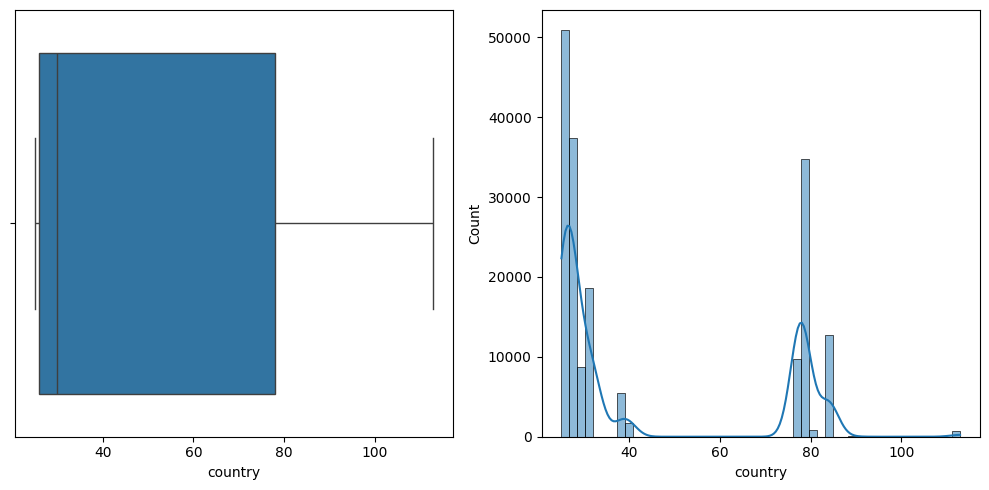

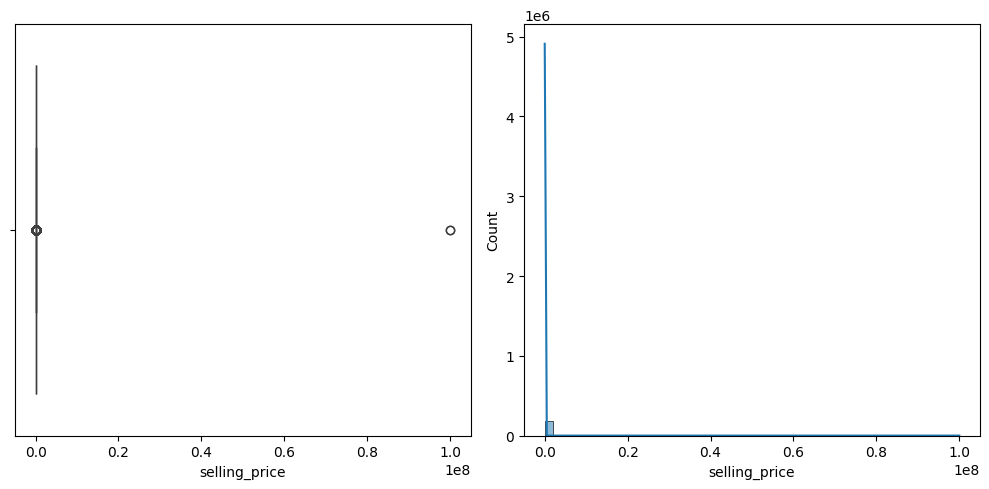

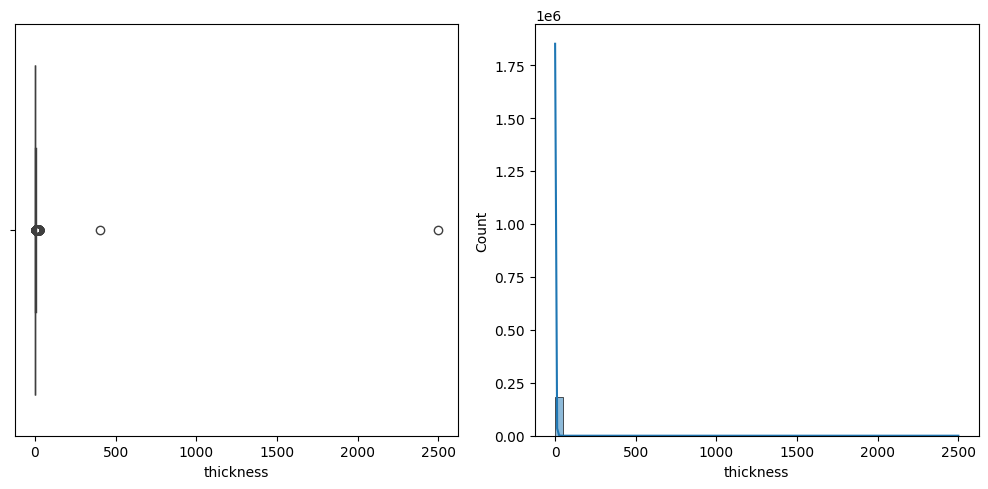

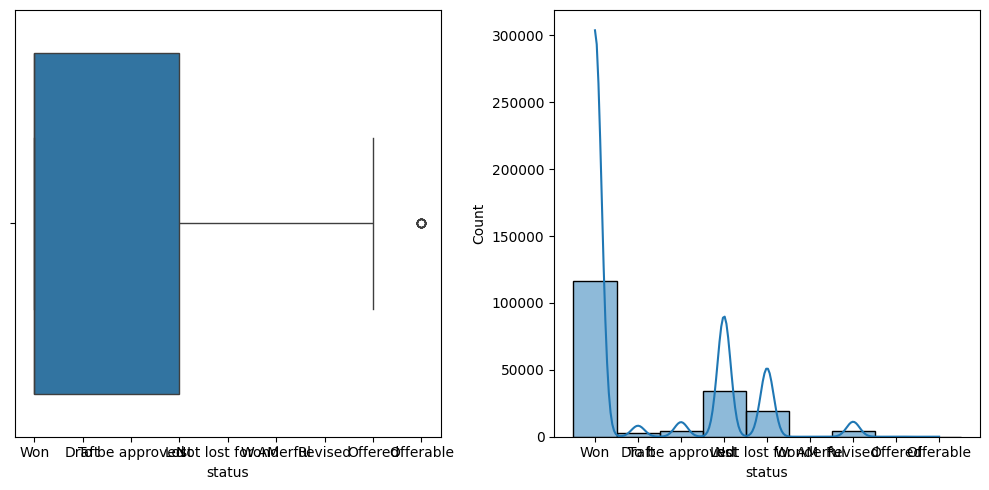

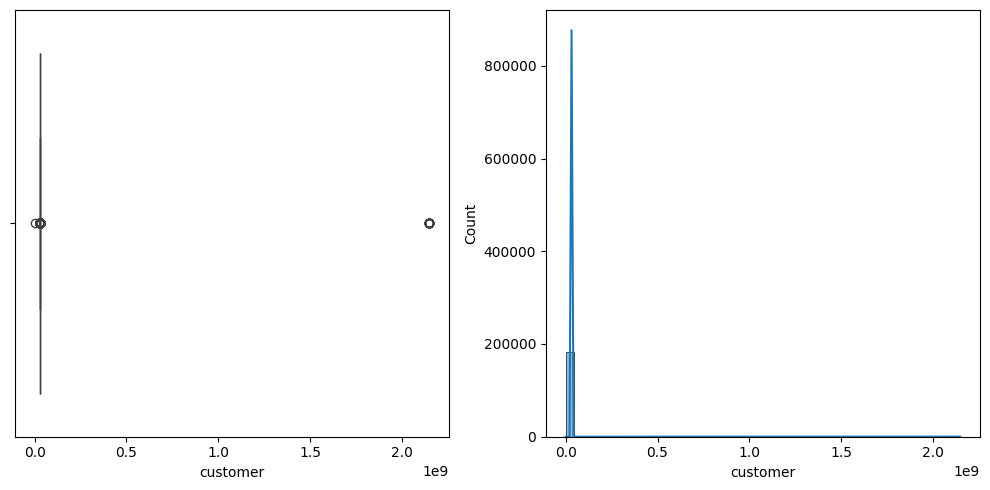

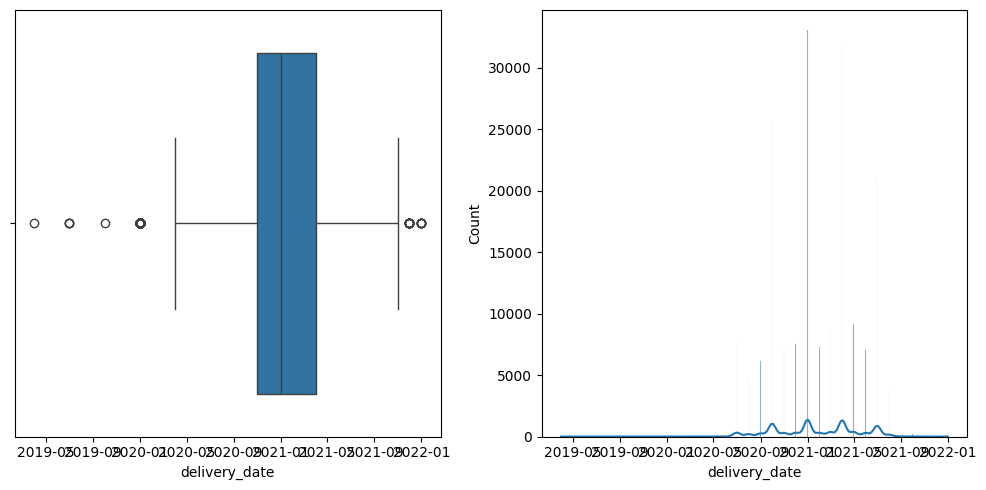

In [119]:
plot_col=['country','selling_price','thickness','status','customer','delivery_date']
for i in plot_col:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.boxplot(x=df1[i])

    plt.subplot(1,2,2)
    sns.histplot(data=df1, x=i, kde=True,bins=50)

    plt.tight_layout()
    plt.show()

## checking columns that has negative values

In [120]:
num=df1.select_dtypes(include=['number']).columns
for col in num:
    print(f"{col} -  {(df1[col] <= 0).sum()}")

quantity_tons -  4
customer -  0
country -  0
application -  0
thickness -  0
width -  0
product_ref -  0
selling_price -  7


### Updating negative data points with null so we can impute during nulll treatment

In [121]:
col_to_mask=['quantity_tons', 'selling_price']
df1[col_to_mask] =df1[col_to_mask] .mask(df1[col_to_mask] <= 0, np.nan)

## Imputing null datapoints

In [122]:
df1=df1.drop(['id'],axis=1)
df1.status = df1.status.fillna(df1.status.mode()[0])
df1.customer=df1.customer.fillna(df1.customer.median())
df1.country=df1.country.fillna(df1.country.median())
df1.application=df1.application.fillna(df1.application.median())
df1.thickness=df1.thickness.fillna(df1.thickness.median())
df1.item_date = df1.item_date.fillna(df1.item_date.mode()[0])
df1.delivery_date = df1.delivery_date.fillna(df1.delivery_date.mode()[0])
df1.selling_price=df1.selling_price.fillna(df1.selling_price.median())
df1.quantity_tons=df1.quantity_tons.fillna(df1.quantity_tons.median())
df1.material_ref = df1.material_ref.fillna(df1.material_ref.mode()[0])

In [123]:
print(df1.isnull().sum())
print(df1.shape)

item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64
(181673, 13)


## Updating datatypes for efficient usage

In [124]:
type_dict = {
    'item_date': 'datetime64[s]',
    'quantity_tons': 'float32',
    'customer': 'int64',
    'country': 'int8',
    'status': 'category',
    'item_type': 'category',
    'application': 'int8',
    'thickness': 'float32',
    'width': 'int32',
    'product_ref': 'int64',
    'selling_price': 'float64',
    'delivery_date': 'datetime64[s]'
}

df1 = df1.astype(type_dict)

# df1.item_date = pd.to_datetime(df1.item_date,format='%Y%m%d', errors='coerce')
# df1.delivery_date = pd.to_datetime(df1.delivery_date,format='%Y%m%d', errors='coerce')

## Checking dataframe after null treatment & data type adjustment

In [125]:
print(df1.isnull().sum().sum(),'\n\n',df1.shape,'\n\n')
df1.info()

0 

 (181673, 13) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype        
---  ------         --------------   -----        
 0   item_date      181673 non-null  datetime64[s]
 1   quantity_tons  181673 non-null  float32      
 2   customer       181673 non-null  int64        
 3   country        181673 non-null  int8         
 4   status         181673 non-null  category     
 5   item_type      181673 non-null  category     
 6   application    181673 non-null  int8         
 7   thickness      181673 non-null  float32      
 8   width          181673 non-null  int32        
 9   material_ref   181673 non-null  object       
 10  product_ref    181673 non-null  int64        
 11  delivery_date  181673 non-null  datetime64[s]
 12  selling_price  181673 non-null  float64      
dtypes: category(2), datetime64[s](2), float32(2), float64(1), int32(1), int64(2), int8(2), object(1)
m

In [126]:
df1.describe().T


,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:05,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.000000,5874.905762,0.000010,10.971669,30.365013,67.160385,1000000000.000000,2349074.750000
customer,181673.000000,30512207.338300,12458.000000,30196884.000000,30205242.000000,30280416.000000,2147483647.000000,24333748.622752
country,181673.000000,44.890727,25.000000,26.000000,30.000000,78.000000,113.000000,24.403034
application,181673.000000,25.614406,2.000000,10.000000,15.000000,41.000000,99.000000,17.753421
thickness,181673.000000,2.564822,0.180000,0.700000,1.500000,3.000000,2500.000000,6.572303
width,181673.000000,1295.285898,1.000000,1180.000000,1250.000000,1500.000000,2990.000000,261.634673
product_ref,181673.000000,473967910.724318,611728.000000,611993.000000,640665.000000,1332077137.000000,1722207579.000000,717510064.710402
delivery_date,181673,2021-01-25 22:43:50,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.000000,1918.075544,0.100000,669.000000,812.000000,953.000000,100001015.000000,331794.729145


In [127]:
df1.dtypes

item_date        datetime64[s]
quantity_tons          float32
customer                 int64
country                   int8
status                category
item_type             category
application               int8
thickness              float32
width                    int32
material_ref            object
product_ref              int64
delivery_date    datetime64[s]
selling_price          float64
dtype: object

## Checking duplicates

In [128]:
print(df1.duplicated().sum())

0


# EDA before handling Outliers and Skewness

## Defining a function to plot datapoint

In [129]:
def plot(df, column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()[0]
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    plt.axvline(mean, color='red', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='green', label='Mode')
    plt.legend()

def plot1(df, column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()
    sns.histplot(data=df, x=column, kde=True,bins=50)
    plt.title(f'Distribution Plot for {column}')
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='black',label='Median')
    plt.axvline(mode[0],color='green',label='Mode')
    plt.legend()

def plot2(df, column):
    stat.probplot(df[column],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for {column}')


In [130]:
def plots(df1,width):
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plot(df1,width)

    plt.subplot(1,3,2)
    plot1(df1,width)

    plt.subplot(1,3,3)
    plot2(df1,width)

    plt.tight_layout() 
    plt.show()


## Checking Skewness

## You can understand the presence and direction of skewness by looking at the skew values in the dictionary.

#### General interpretations of a skew value:
1. Positive Skew / Right Skew -  If the skew value is positive (greater than 0), the distribution is skewed to the right. A positive skew value greater than 1 suggests a moderately strong right skew.
2. Negative Skew / Left Skew - If the skew value is negative (less than 0), the distribution is skewed to the left. A negative skew value less than -1 suggests a moderately strong left skew.
3. Values closer to zero indicate a distribution closer to symmetry. A longer tail extending towards higher values.

In [131]:
skew_dict=dict(df1.select_dtypes(include='number').skew())
skew_dict

{'quantity_tons': 424.6908264160156,
 'customer': 86.98530835413473,
 'country': 0.7538348729685946,
 'application': 0.7245643807542177,
 'thickness': 303.44757080078125,
 'width': 0.3744547861560771,
 'product_ref': 1.0152155732872308,
 'selling_price': 301.3880881607121}

In [132]:
#Defining Colors  to print  skewness based on the nature
color_positive = '\033[92m'  # Green for positive skew
color_negative = '\033[91m'  # Red for negative skew
color_neutral = '\033[0m'  # Reset color for near-zero skew

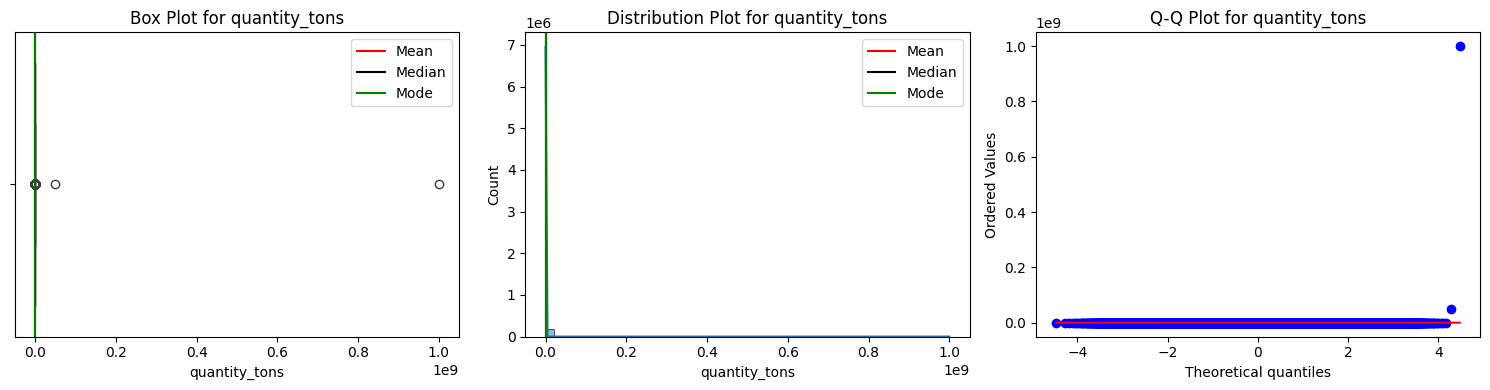

Skew for quantity_tons is 424.69


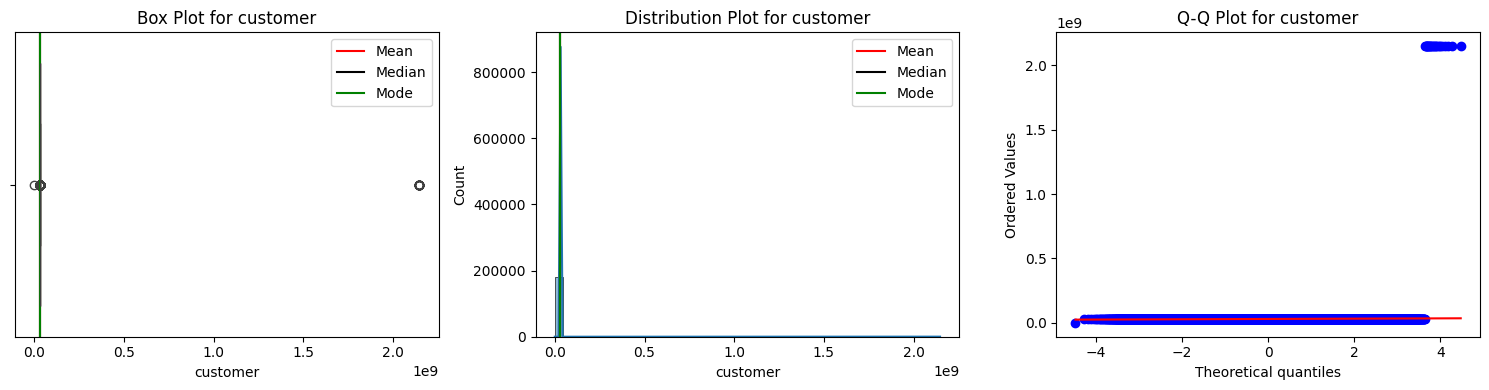

Skew for customer is 86.99


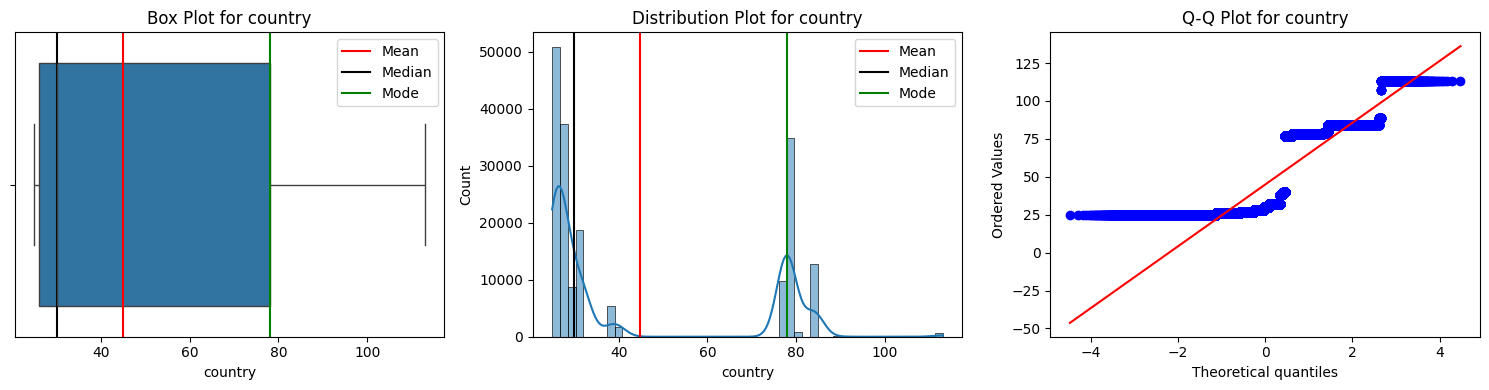

Skew for country is 0.75


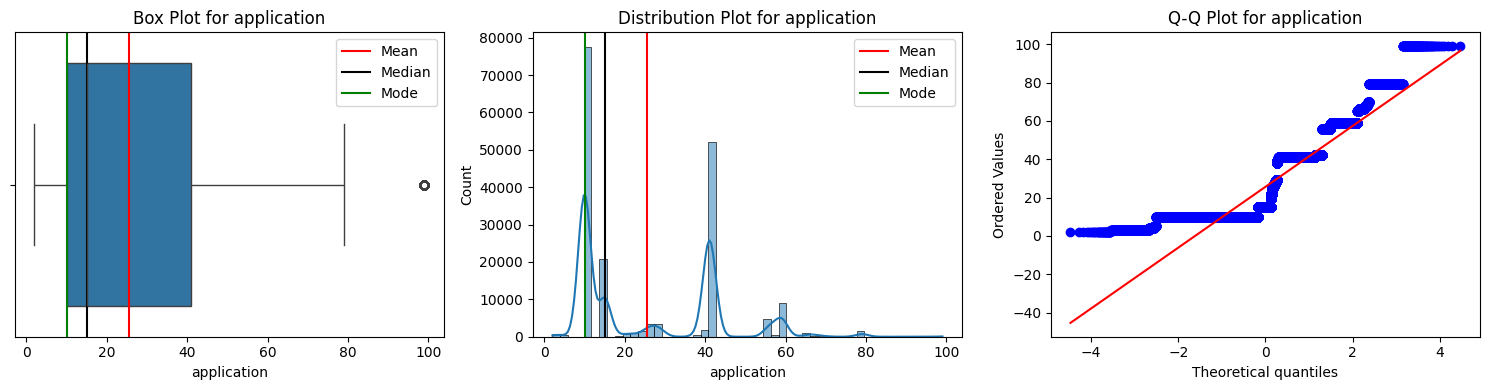

Skew for application is 0.72


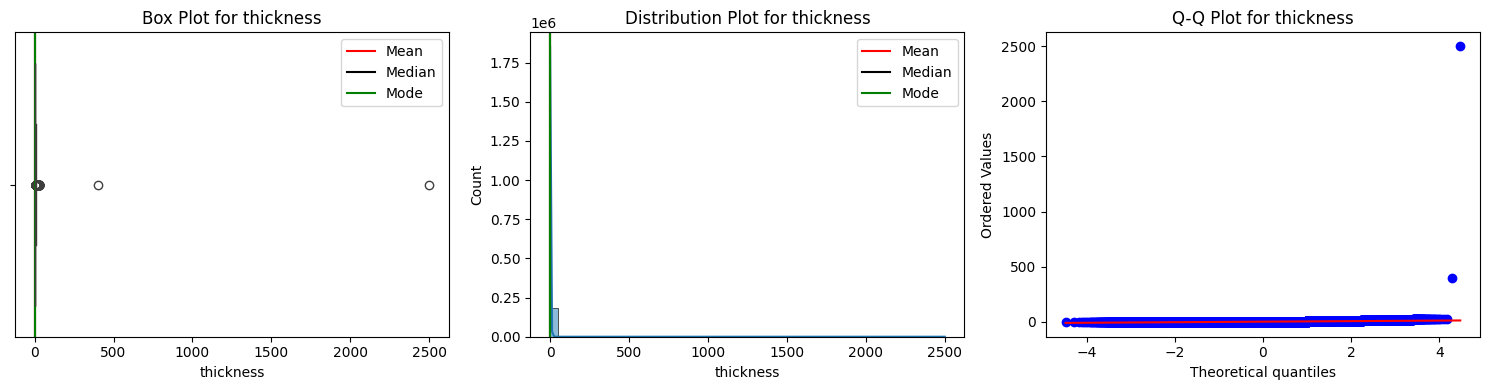

Skew for thickness is 303.45


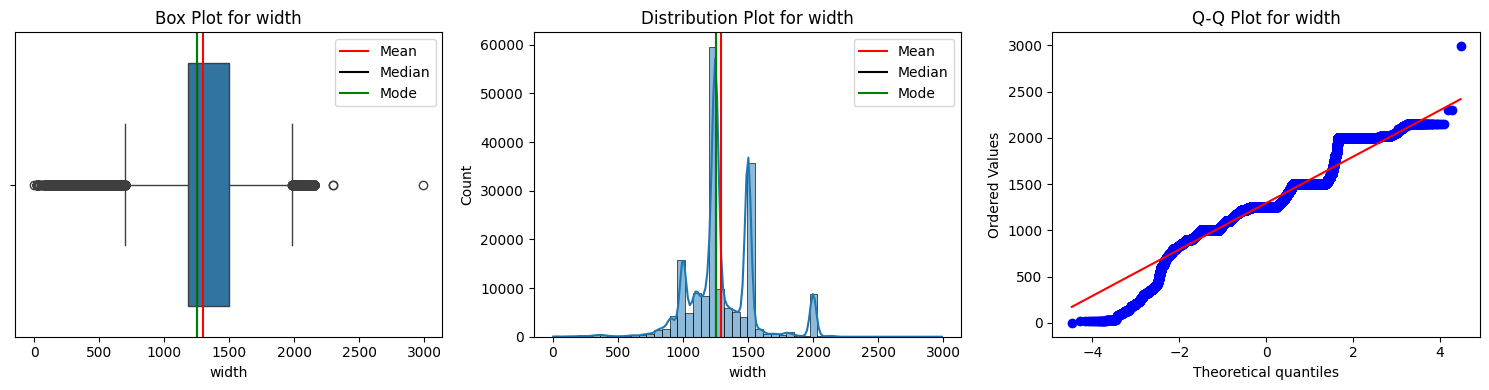

Skew for width is 0.37


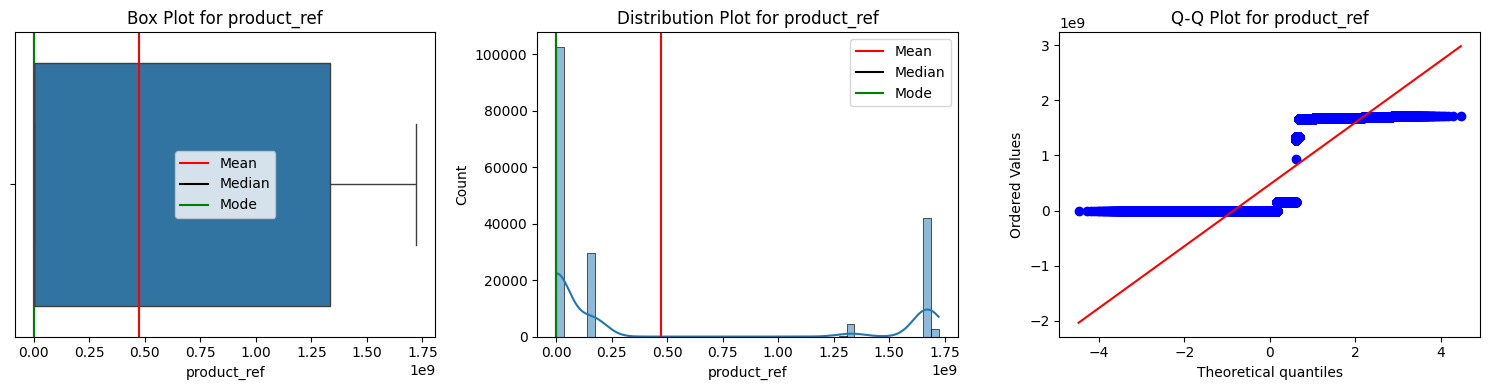

Skew for product_ref is 1.02


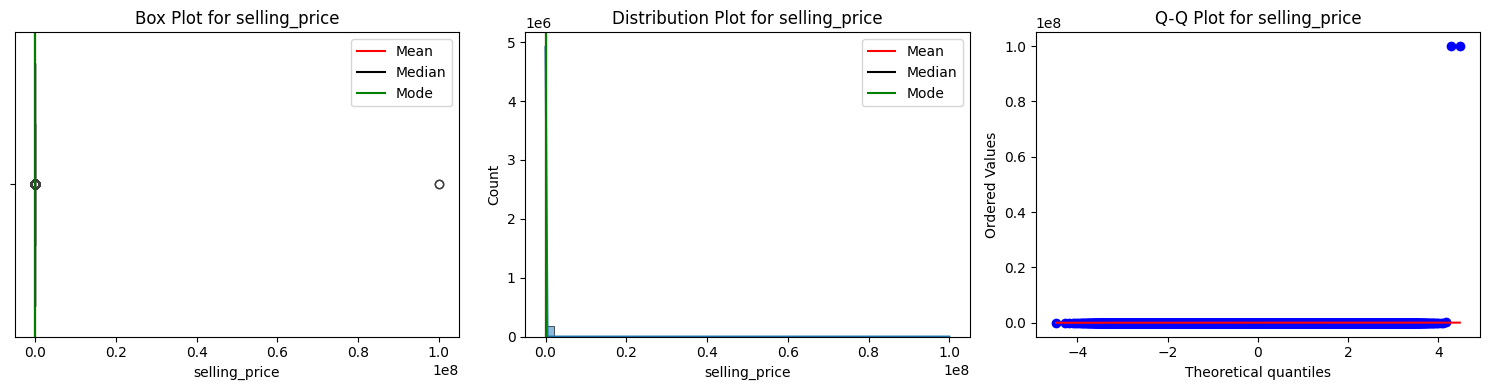

Skew for selling_price is 301.39
Skewed columns - ['quantity_tons', 'customer', 'country', 'application', 'thickness', 'product_ref', 'selling_price']


In [133]:
skewed_col=[]
for i in df1.select_dtypes(include='number'):
    plots(df1,i)
    skew_val = skew_dict[i]
    color = color_neutral
    if skew_val > 0.5:
        color = color_positive
        skewed_col.append(i)
    elif skew_val < -0.5:
        color = color_negative
        skewed_col.append(i)
    print(f"{color}Skew for {i} is {skew_val:.2f}{color_neutral}")    
print(f"Skewed columns - {skewed_col}")

In [199]:
df1.delivery_date.value_counts()

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

In [203]:
df2=df1.copy()

In [34]:
# df2=df1.copy()
# def zscore_outlier_handling(df,threshold=3,columns=None):
#     columns = df.select_dtypes(include='number').columns.tolist()
#     z_scores=stat.zscore(df[columns])
#     outliers_mask = (np.abs(z_scores) > threshold).any(axis=1)
#     for column in columns:
#         median_value = df[column].median()
#         df.loc[outliers_mask, column] = median_value

#     return df
# zscore_outlier_handling(df2,threshold=3) 

In [204]:
df2.delivery_date.value_counts()

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

In [135]:
def outlier(df, column,iqr_fact):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (iqr_fact*iqr)
    lower_threshold = df[column].quantile(0.25) - (iqr_fact*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    return df
delivery_date
for i in ['quantity_tons','thickness','width','selling_price','application']:
    outlier(df2,i,1.5)

In [205]:
df1.delivery_date.value_counts()

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

# Experimenting a few types of data transformation techniques to see which suits best

In [208]:
df2.delivery_date.value_counts()

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

In [136]:
def boxcox_transform(x):
    # Perform Box-Cox transformation
    transformed_data = boxcox(x)[0]  # boxcox returns a tuple, we extract the first element
    return transformed_data

In [207]:
method_functions =  {
    'log': np.log,
    'square': np.sqrt,
    'rec': lambda x: 1 / x,
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'pow': lambda x: np.power(x, 2),
    'boxcox': boxcox_transform,
        }

def skewness(df, column, method):
    normalized_df=pd.DataFrame()

    for method_name, func in method_functions.items():
        for col in column:

            new_column = f'{col}_{method_name}'
            transformed_values = func(df[col])
            normalized_df[new_column] = transformed_values

    return normalized_df
columns=['quantity_tons','thickness','selling_price']
normalized_df=skewness(df2, columns, method_functions)

## Plotting transformed data to see visually.

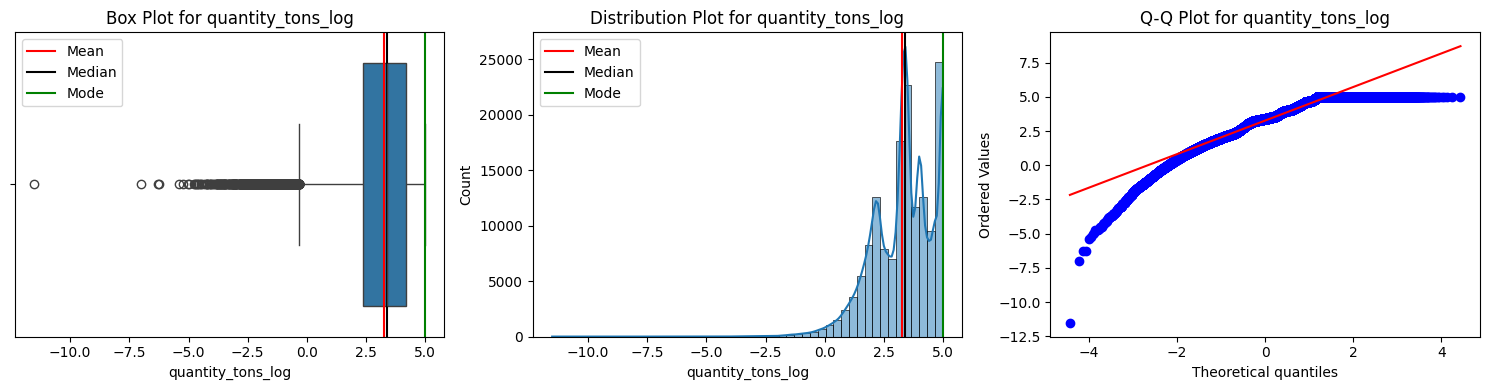

Skenewss of quantity_tons_log = -0.7771696922550089


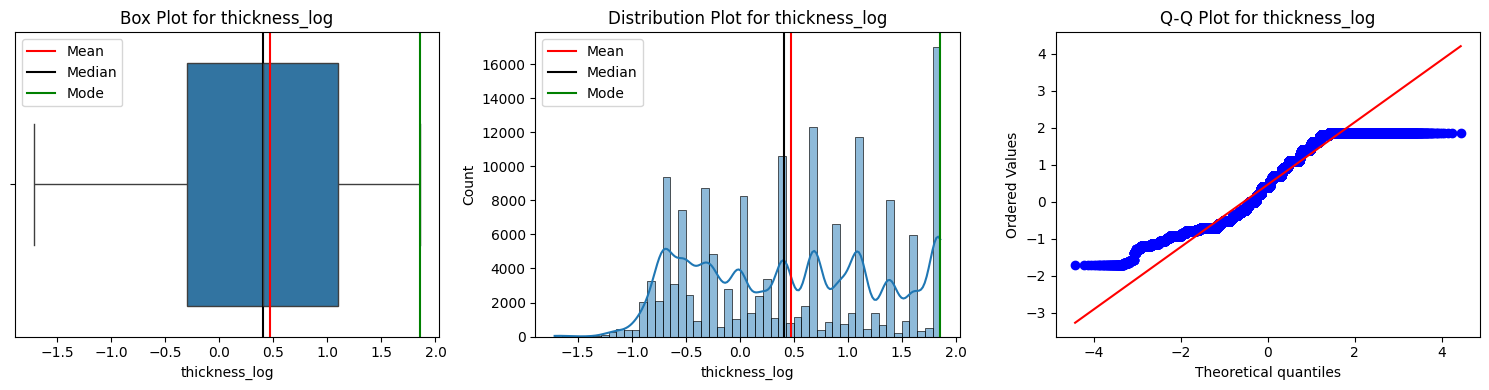

Skenewss of thickness_log = 0.0702405455655681


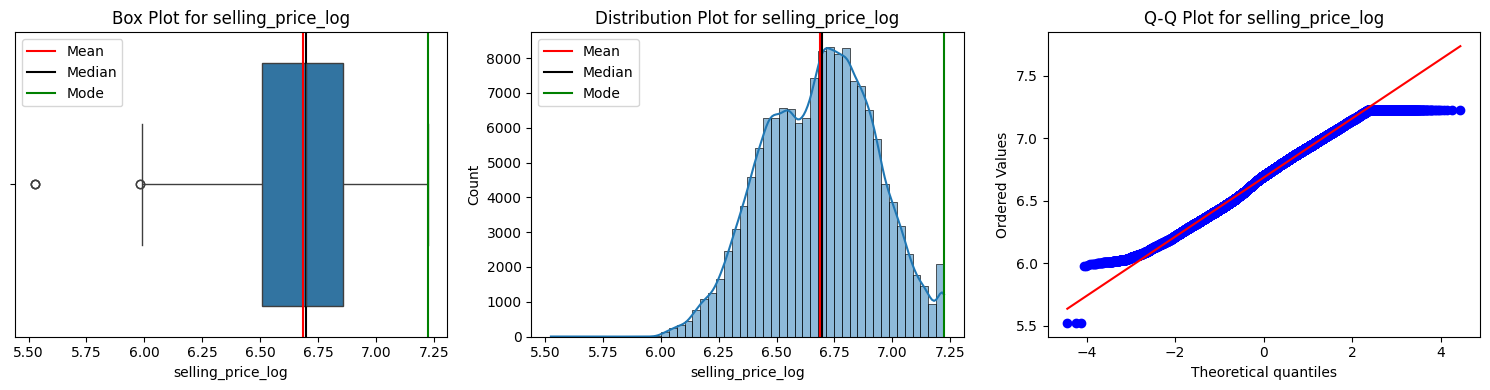

Skenewss of selling_price_log = -0.08619652358010342


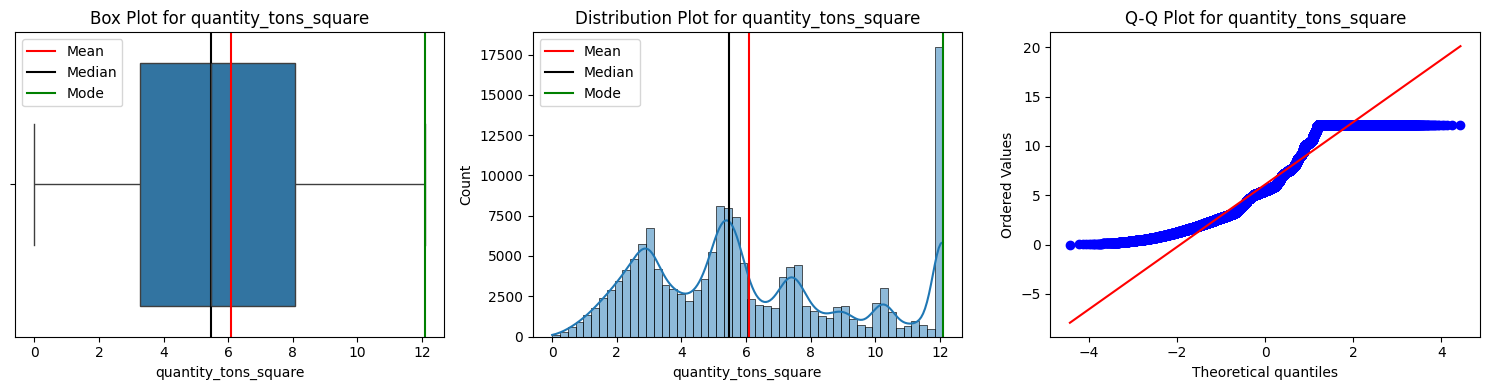

Skenewss of quantity_tons_square = 0.5005182414271268


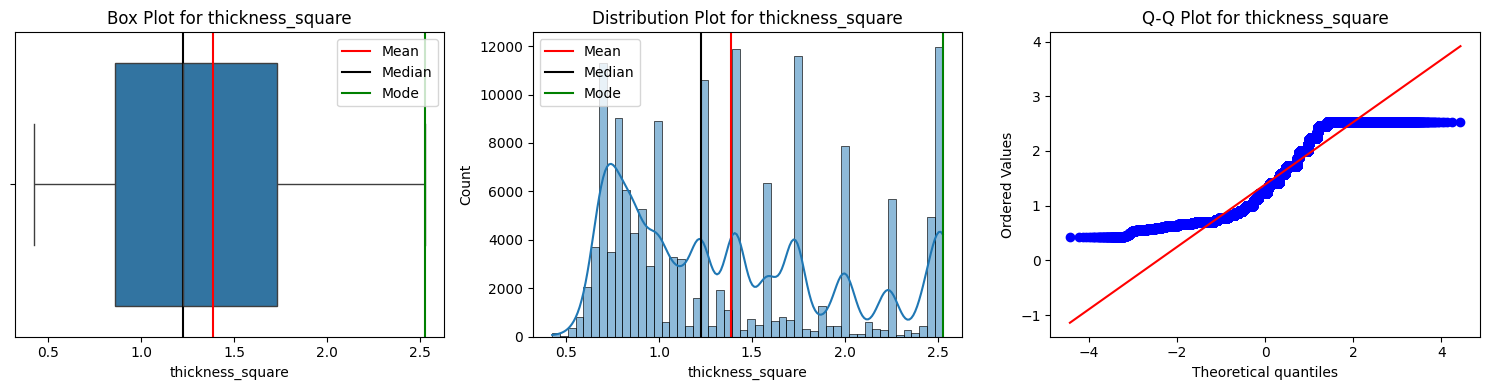

Skenewss of thickness_square = 0.5716124301536649


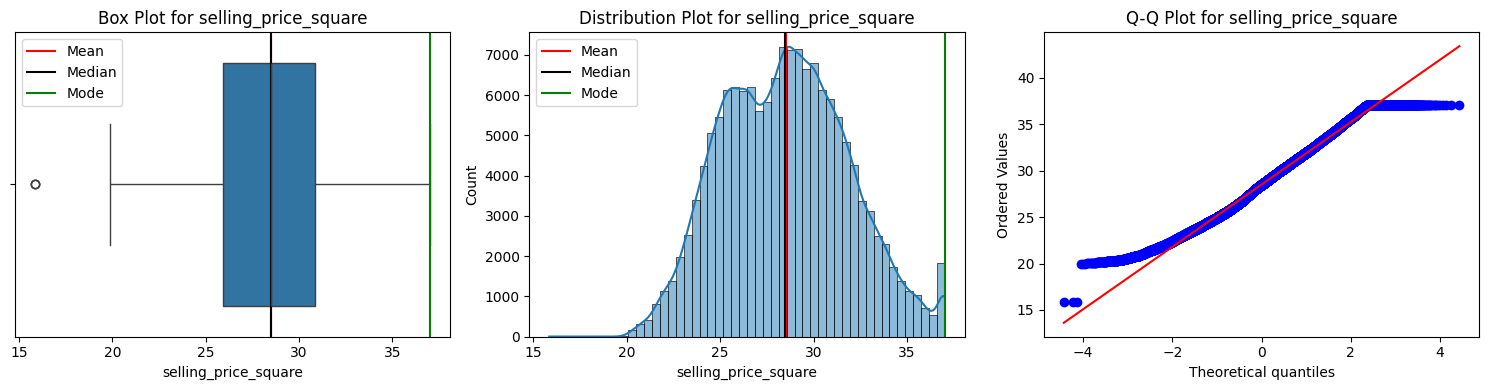

Skenewss of selling_price_square = 0.182240106711918


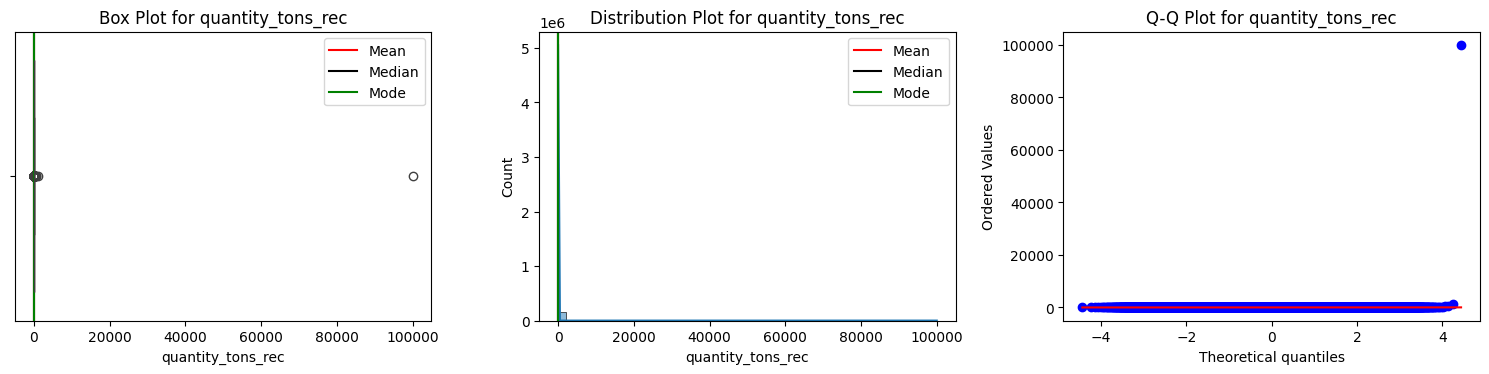

Skenewss of quantity_tons_rec = 387.75191812066805


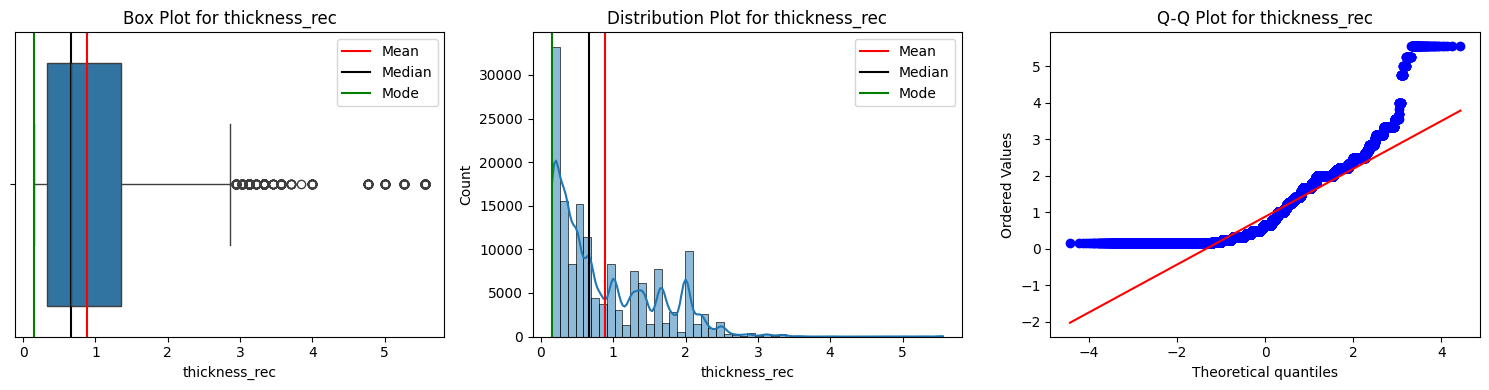

Skenewss of thickness_rec = 1.0926380669162004


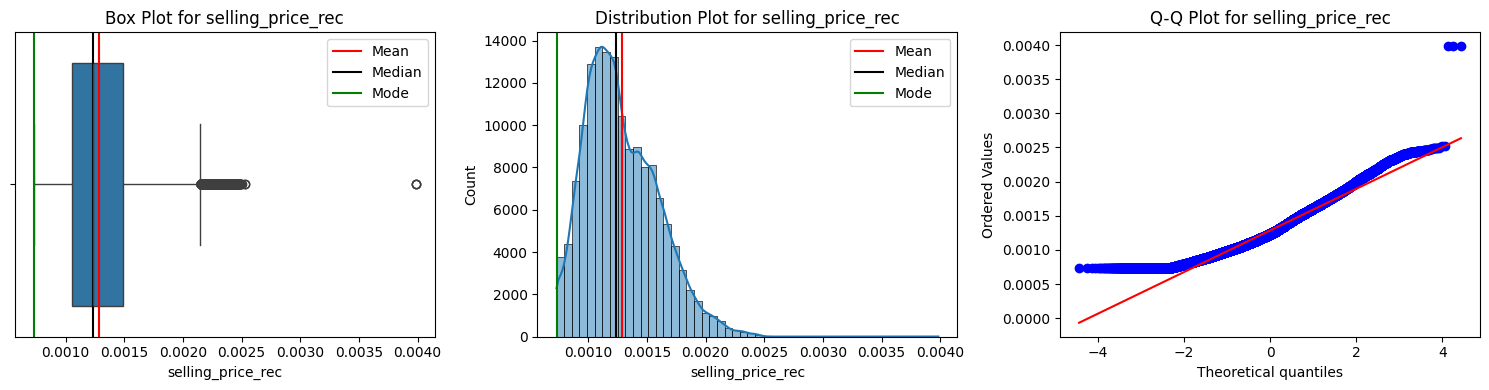

Skenewss of selling_price_rec = 0.6425789407429979


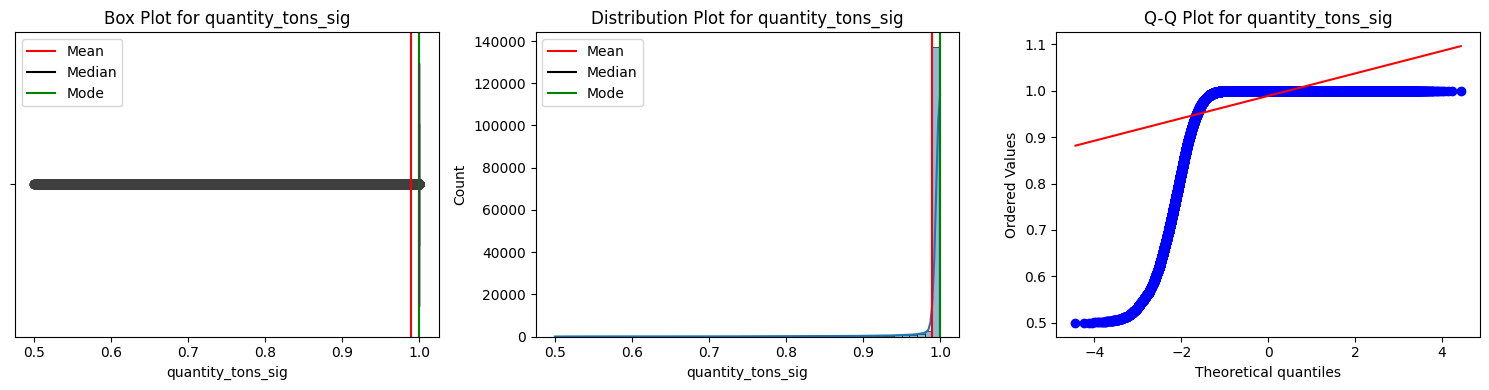

Skenewss of quantity_tons_sig = -6.162160785342153


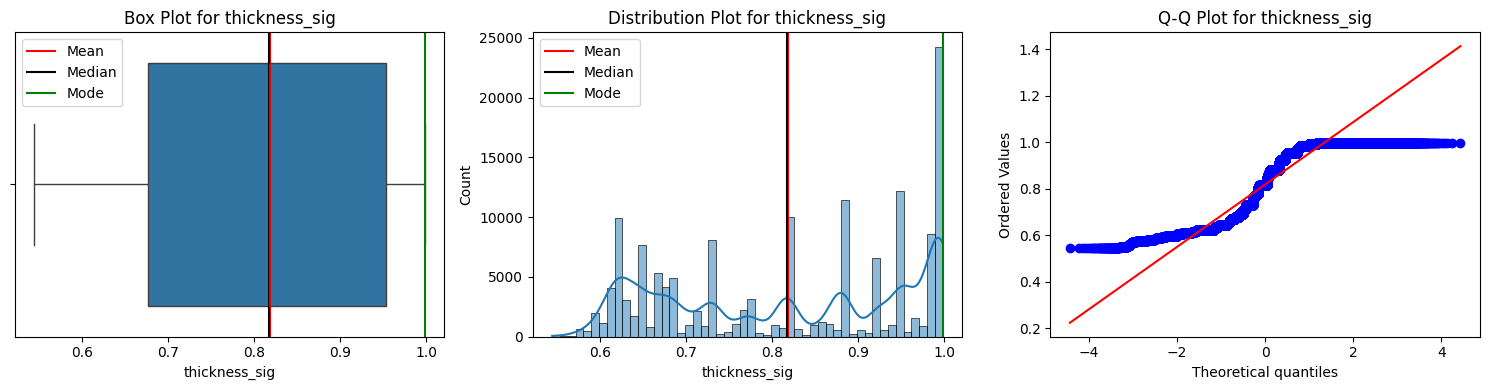

Skenewss of thickness_sig = -0.12723292065612987


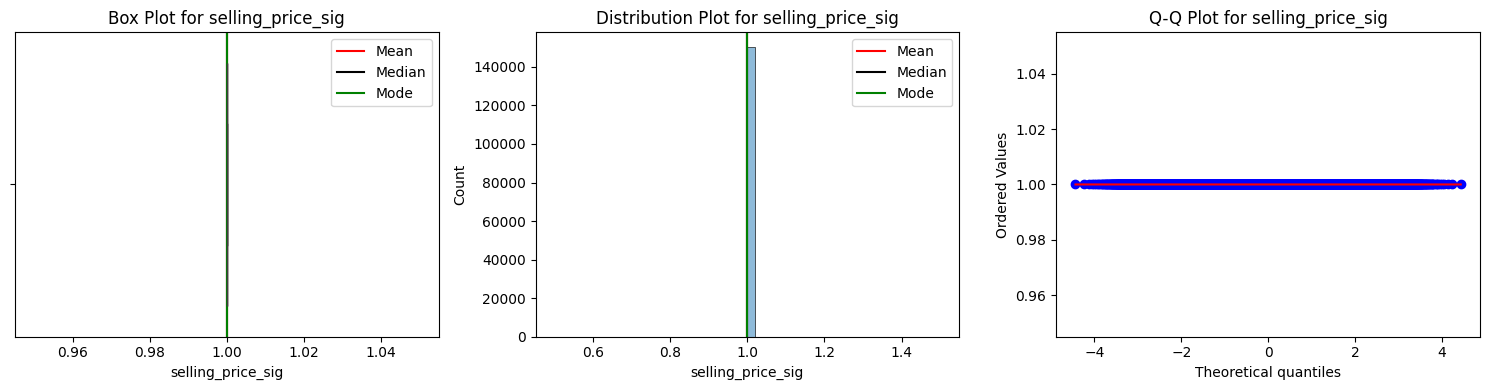

Skenewss of selling_price_sig = 0.0


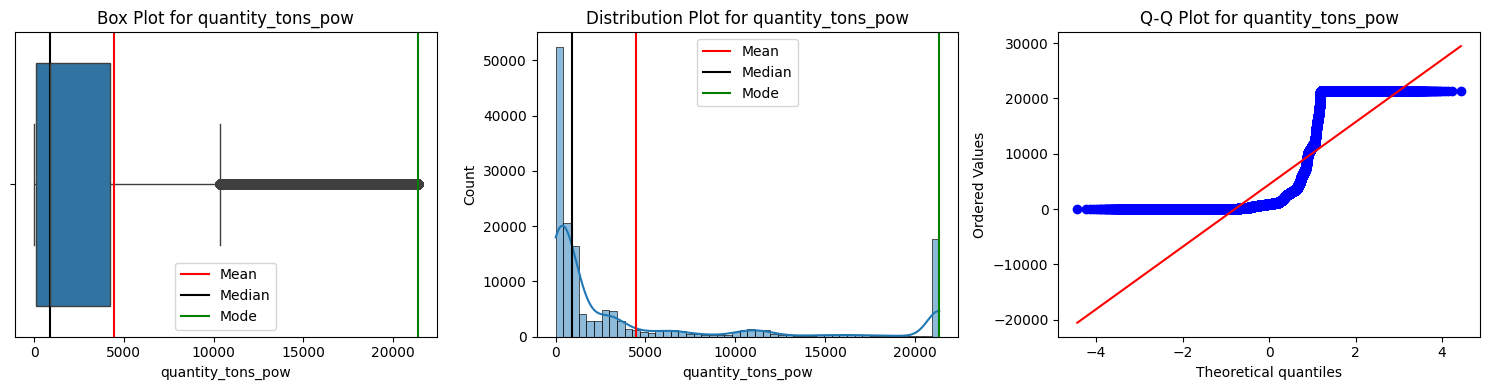

Skenewss of quantity_tons_pow = 1.660089350220136


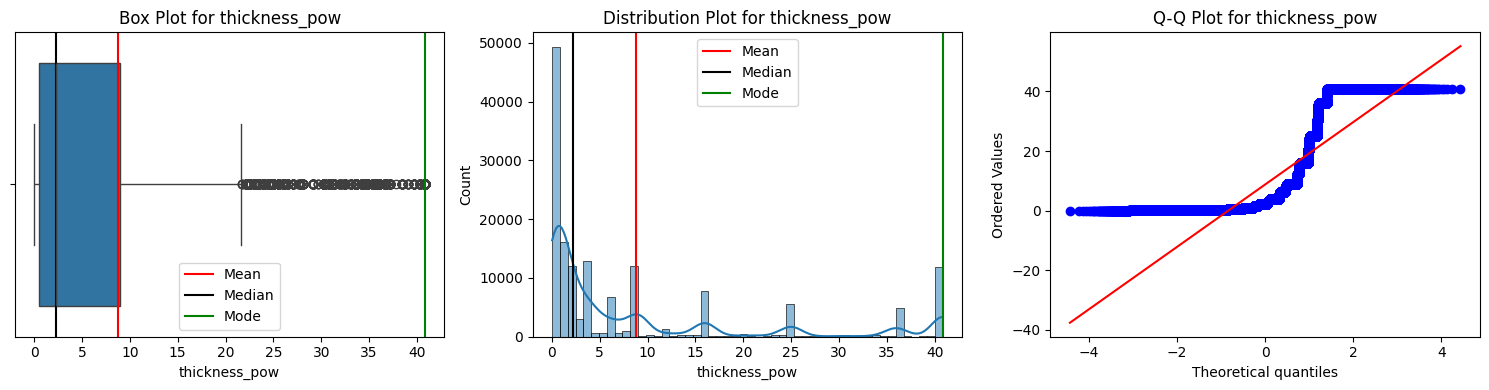

Skenewss of thickness_pow = 1.6270118515662564


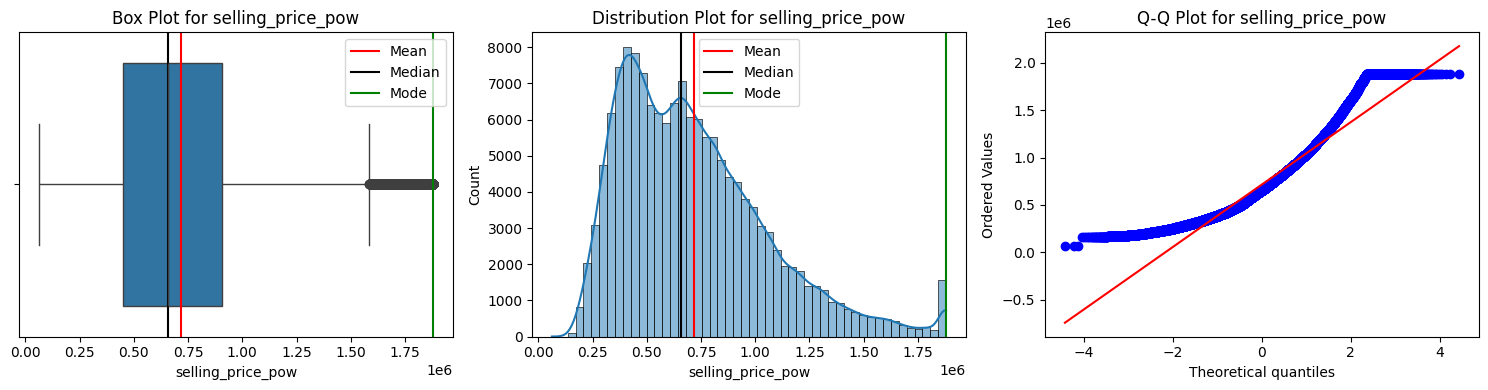

Skenewss of selling_price_pow = 1.00581994519163


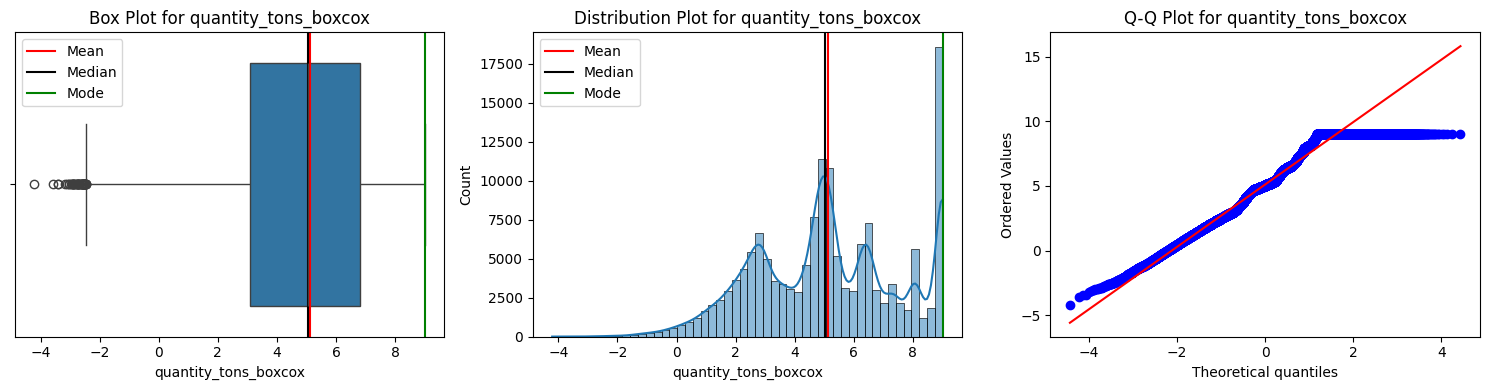

Skenewss of quantity_tons_boxcox = -0.05954687311030487


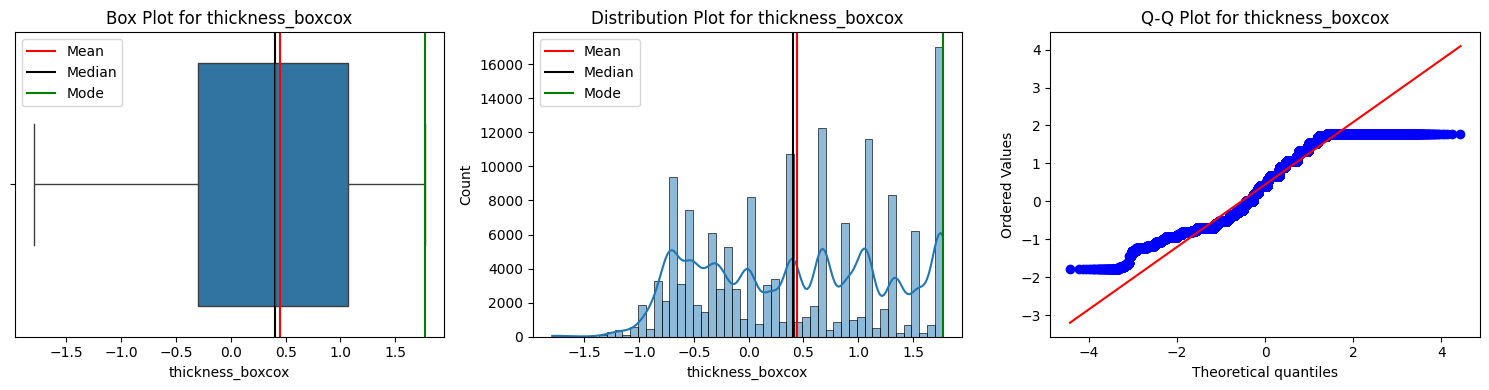

Skenewss of thickness_boxcox = 0.01762450792900939


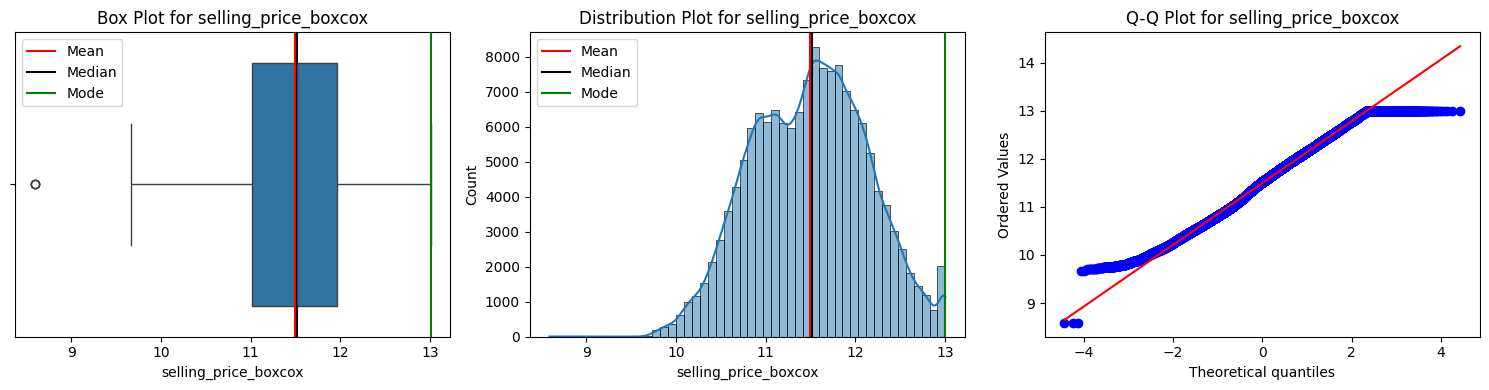

Skenewss of selling_price_boxcox = -0.005789074370477499


In [138]:
for i in normalized_df.columns:
    plots(normalized_df,i)
    print(f'Skenewss of {i} = {normalized_df[i].skew()}')

# Data Transformation

From the experiment above,we could see that the  boxcox data transformation method is best.

In [209]:
df2.delivery_date.value_counts()

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

In [139]:
df2['quantity_tons_boxcox'] = boxcox_transform(df2['quantity_tons'])
df2['thickness_boxcox'] = boxcox_transform(df2['thickness'])
df2['selling_price_boxcox'] = boxcox_transform(df2['selling_price'])
df2.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,quantity_tons_boxcox,thickness_boxcox,selling_price_boxcox
0,1970-08-22 22:00:01,54.151138,30156308,28,Won,W,10.000000,2.000000,1500,DEQ1 S460MC,1670798778,1970-08-22 22:05:01,854.000000,6.366397,0.681077,11.659103
1,1970-08-22 22:00:01,146.118436,30202938,25,Won,W,41.000000,0.800000,1210,DX51D+Z,1668701718,1970-08-22 22:00:01,1047.000000,9.013941,-0.224414,12.226556
2,1970-08-22 22:00:01,146.118436,30153963,30,Won,WI,28.000000,0.380000,952,S0380700,628377,1970-08-22 21:55:01,644.330000,9.013941,-0.991776,10.902444
3,1970-08-22 22:00:01,146.118436,30349574,32,Won,S,59.000000,2.300000,1317,DX51D+ZM310MAO 2.3X1317,1668701718,1970-08-22 21:55:01,768.000000,9.013941,0.815522,11.370275
4,1970-08-22 22:00:01,146.118436,30211560,28,Won,W,10.000000,4.000000,1986,2_S275JR+AR-CL1,640665,1970-08-22 21:58:21,577.000000,9.013941,1.338572,10.614588


## Checking transformed data points range so we can apply appropriate data type

In [140]:
print(df2.selling_price_boxcox.min(), '  -  ' , df2.selling_price_boxcox.max())
print(df2.thickness_boxcox.min(), '  -  ' , df2.thickness_boxcox.max())
print(df2.quantity_tons_boxcox.min(), '  -  ' , df2.quantity_tons_boxcox.max())

8.5900351187116   -   13.004487665491363
-1.7917628675946216   -   1.7699778527278847
-4.212077971131139   -   9.01394126741655


In [141]:
df2['selling_price_boxcox'] = df2['selling_price_boxcox'].astype('int32')
df2['thickness_boxcox'] = df2['thickness_boxcox'].astype('int8')
df2['quantity_tons_boxcox'] = df2['quantity_tons_boxcox'].astype('int8')

# EDA After handling Outliers and Skewness

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

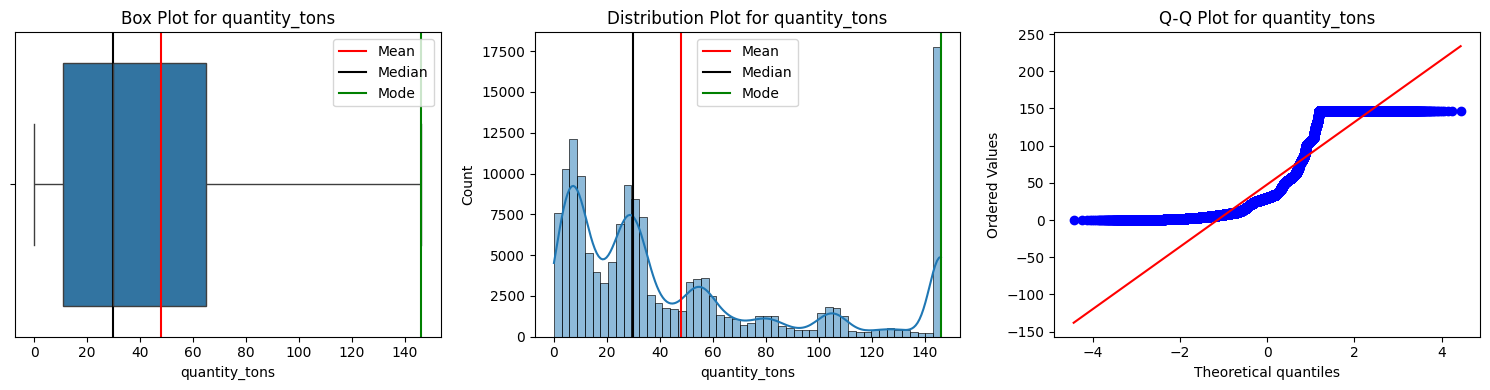

Skew for quantity_tons is 1.10


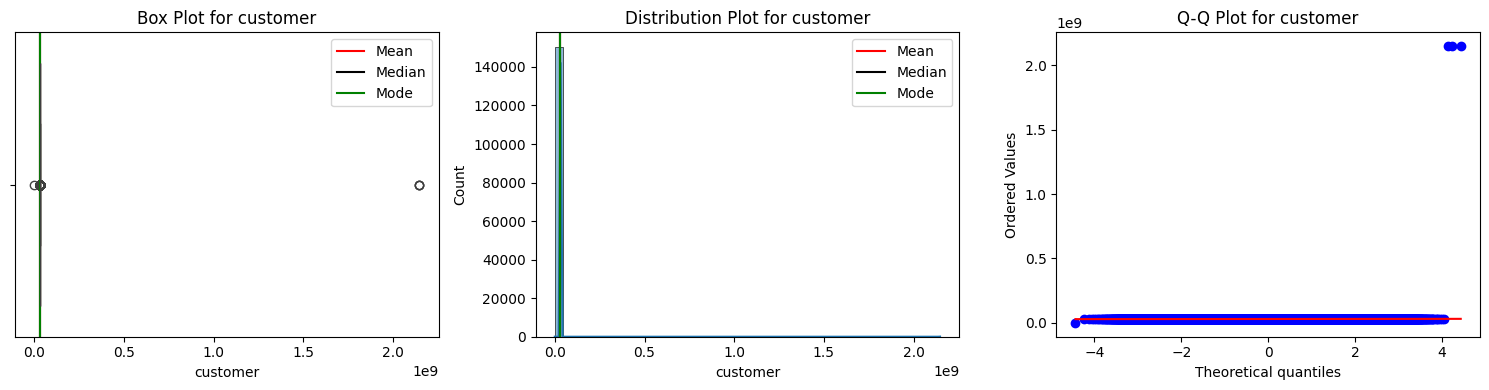

Skew for customer is 223.89


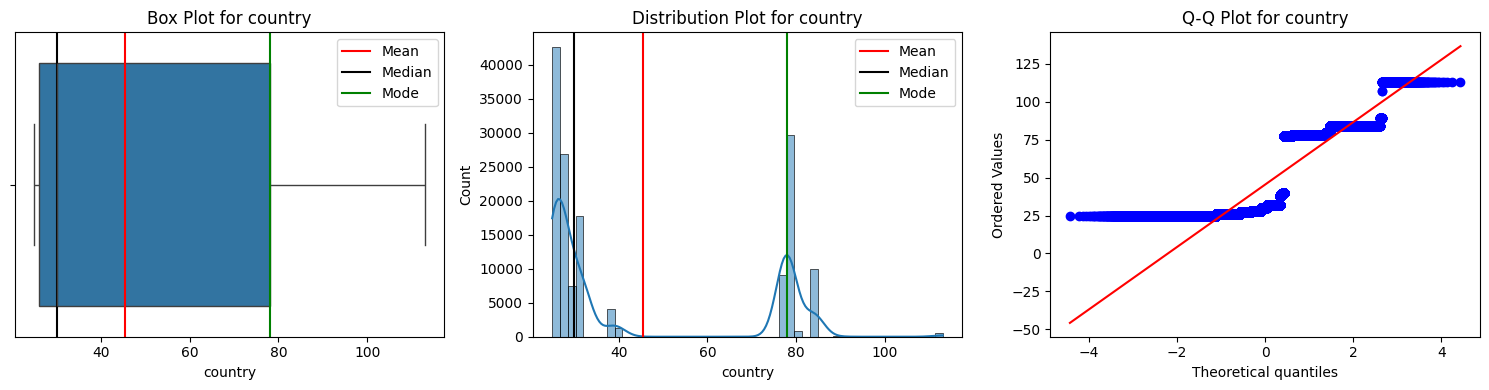

Skew for country is 0.71


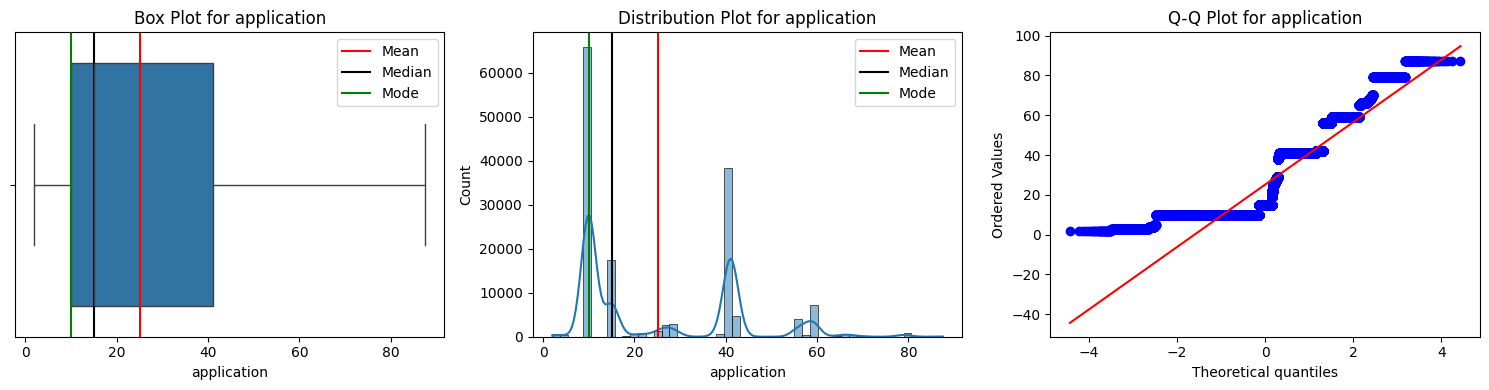

Skew for application is 0.73


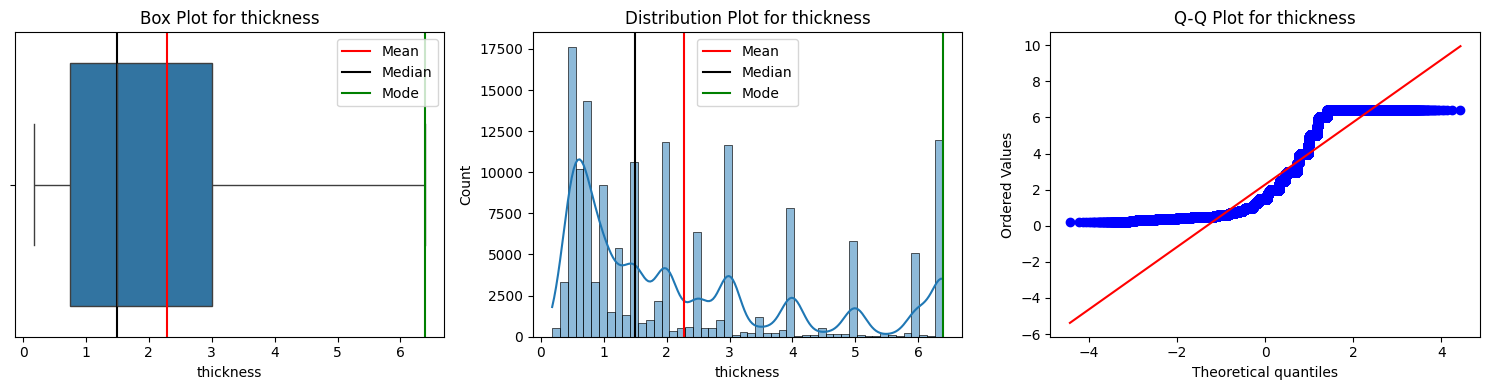

Skew for thickness is 1.01


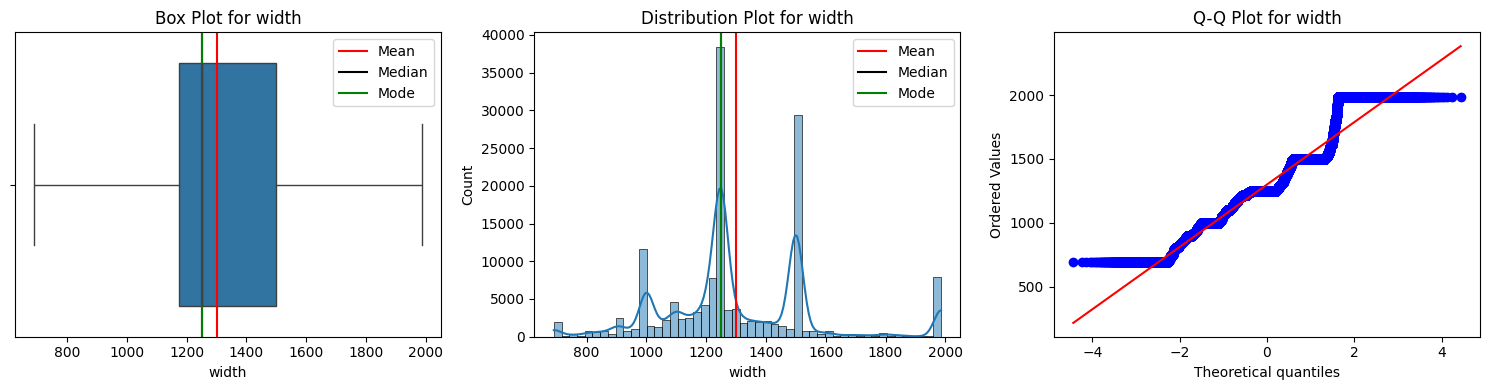

Skew for width is 0.66


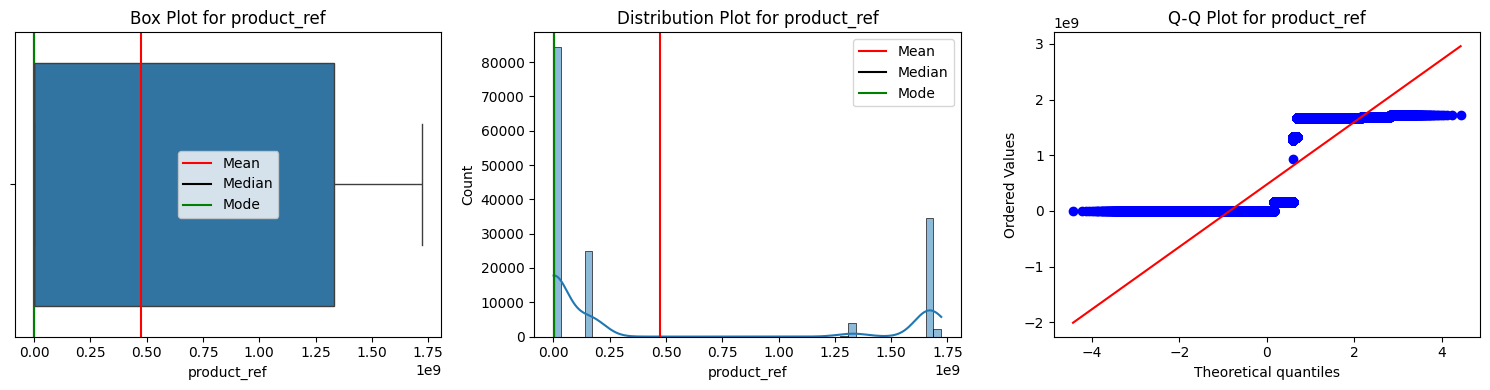

Skew for product_ref is 1.01


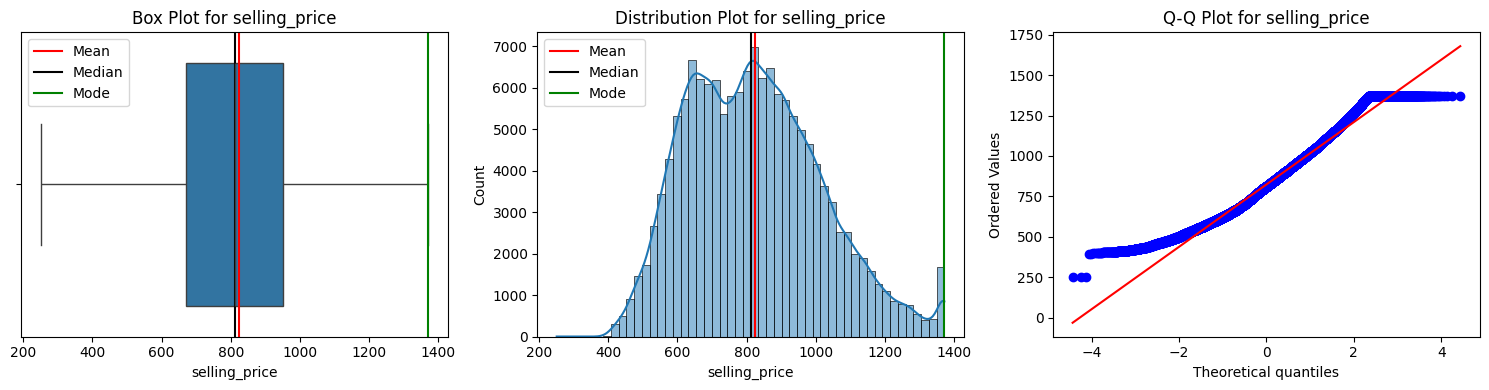

Skew for selling_price is 0.45


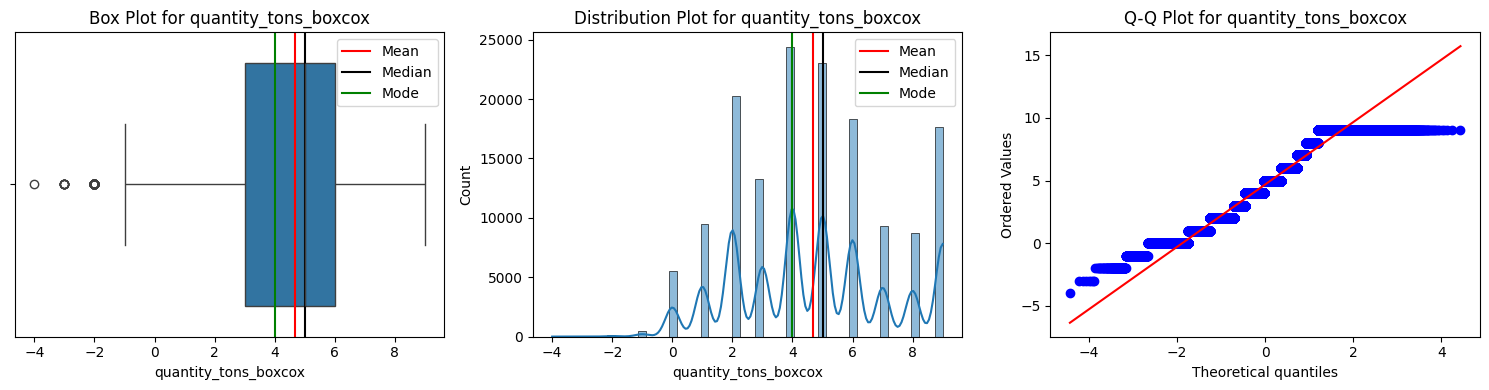

Skew for quantity_tons_boxcox is 0.11


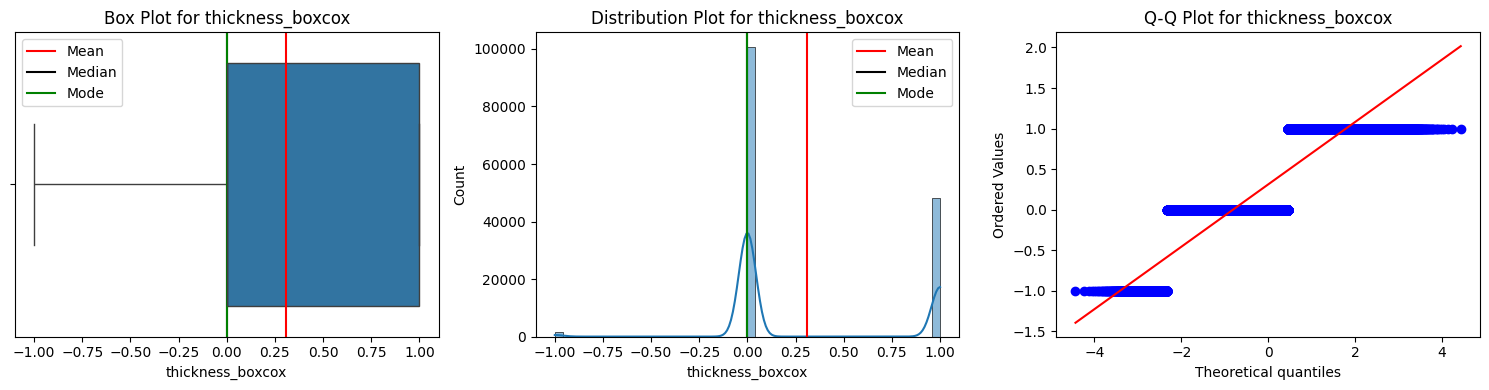

Skew for thickness_boxcox is 0.55


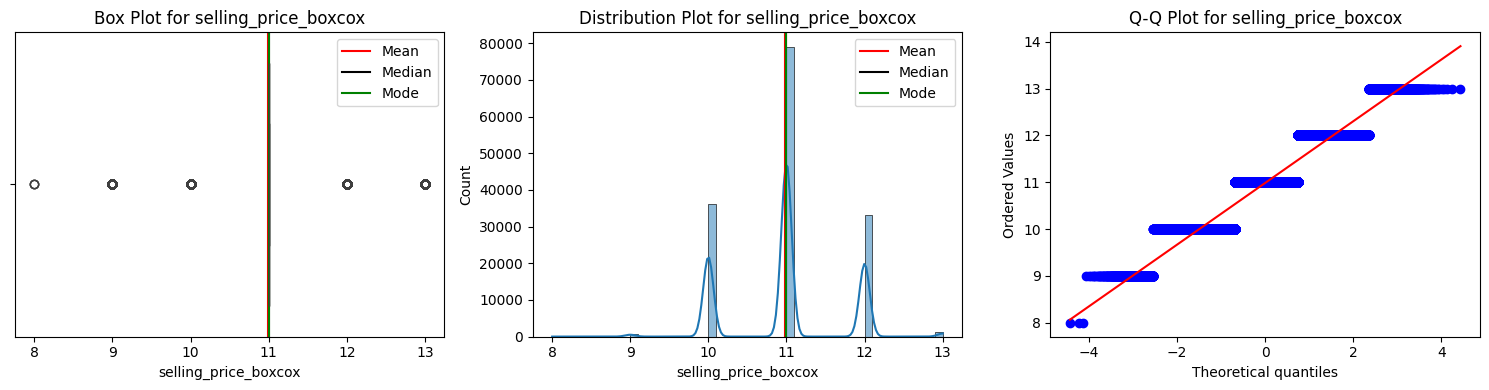

Skew for selling_price_boxcox is 0.08
Skewed columns - ['quantity_tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'thickness_boxcox']


In [142]:
color_positive = '\033[92m'  # Green for positive skew
color_negative = '\033[91m'  # Red for negative skew
color_neutral = '\033[0m'  # Reset color for near-zero skew
skewed_col=[]
for i in  df2.select_dtypes(include='number'):
    plots(df2,i)
    skew_val = df2[i].skew()
    color = color_neutral
    if skew_val > 0.5:
        color = color_positive
        skewed_col.append(i)
    elif skew_val < -0.5:
        color = color_negative
        skewed_col.append(i)
    print(f"{color}Skew for {i} is {skew_val:.2f}{color_neutral}")    
print(f"Skewed columns - {skewed_col}")

In [212]:
df2.select_dtypes(include='number').var()

quantity_tons        5518152171520.000000
customer           592131322035296.000000
country                        595.508062
application                    315.183971
thickness                       43.195168
width                        68452.702279
product_ref     514820692960724864.000000
selling_price         110087742288.684845
dtype: float64

# Feature Engineering & Encoding

In [213]:
df2.delivery_date.value_counts()

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

In [214]:
df3=df2.copy()

In [215]:
df3.delivery_date.value_counts()

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

In [218]:
df3['delivery_time_taken'] = (df3.delivery_date-df3.item_date).abs().dt.days

df3['volume'] = (df3.quantity_tons *  df3.thickness *  df3.width)
df3['unit_price'] = (df3['selling_price']/(df3['quantity_tons'] * df3['thickness']))

df3['delivery_day'] = df3['delivery_date'].dt.day
df3['delivery_month'] = df3['delivery_date'].dt.month
df3['delivery_year'] = df3['delivery_date'].dt.year

df3['item_day'] = df3['item_date'].dt.day
df3['item_month'] = df3['item_date'].dt.month
df3['item_year'] = df3['item_date'].dt.year

In [219]:
df3.delivery_date.value_counts()

delivery_date
2021-01-01    33036
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

In [220]:
print(df3.status.unique())
print(df3.status.value_counts())

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful']
status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64


In [221]:
print(df3.item_type.unique())
print(df3.item_type.value_counts())

['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI']
item_type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64


In [222]:
print(df3.country.unique())
print(df3.country.value_counts())

[ 28  25  30  32  38  78  27  77 113  79  26  39  40  84  80 107  89]
country
78     32084
26     27516
25     23362
27     21511
32     18658
28     15824
84     12776
77      9714
30      8730
39      3731
79      2742
38      1712
40      1683
80       819
113      714
89        92
107        5
Name: count, dtype: int64


In [224]:
# encoder = LabelEncoder()

# df3['transformed_country'] = encoder.fit_transform(df3['country'].astype('str'))
encoder = LabelEncoder()
df3['transformed_status'] = df3['status'].map({'Won':1,'Lost':0})
encoder = LabelEncoder()
df3['transformed_item'] = encoder.fit_transform(df3['item_type'])


# df3['transformed_country'] =df3['transformed_country'].astype('int8')
# df3['transformed_status'] = df3['transformed_status'] .astype('int8')
# df3['transformed_item'] = df3['transformed_item'] .astype('int8')

In [225]:
print(df3.item_type.unique(),"\n",df3.transformed_item.unique())
print(df3.item_type.value_counts(),"\n",df3.transformed_item.value_counts())

['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI'] 
 [5 6 3 1 2 0 4]
item_type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64 
 transformed_item
5    105615
3     69236
2      5660
1       610
6       524
0        27
4         1
Name: count, dtype: int64


In [226]:
print(df3.status.unique() , "\n" ,df3.transformed_status.unique())
print(df3.status.value_counts(),"\n", df3.transformed_status.value_counts()) 

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful'] 
 [ 1. nan  0.]
status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64 
 transformed_status
1.000000    116012
0.000000     34438
Name: count, dtype: int64


In [227]:
# print(df3.country.unique() , "\n" ,df3.transformed_country.unique())
# print(df3.country.value_counts(),"\n", df3.transformed_country.value_counts()) 

In [228]:
df3.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:05,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.000000,5874.905762,0.000010,10.971669,30.365013,67.160385,1000000000.000000,2349074.750000
customer,181673.000000,30512207.338300,12458.000000,30196884.000000,30205242.000000,30280416.000000,2147483647.000000,24333748.622752
country,181673.000000,44.890727,25.000000,26.000000,30.000000,78.000000,113.000000,24.403034
application,181673.000000,25.614406,2.000000,10.000000,15.000000,41.000000,99.000000,17.753421
thickness,181673.000000,2.564822,0.180000,0.700000,1.500000,3.000000,2500.000000,6.572303
width,181673.000000,1295.285898,1.000000,1180.000000,1250.000000,1500.000000,2990.000000,261.634673
product_ref,181673.000000,473967910.724318,611728.000000,611993.000000,640665.000000,1332077137.000000,1722207579.000000,717510064.710402
delivery_date,181673,2021-01-25 22:43:50,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.000000,1918.075544,0.100000,669.000000,812.000000,953.000000,100001015.000000,331794.729145


# Dropping uneccesary Datapoints & Columns

In [229]:
df4 = df3[(df3['status'] == 'Won') | (df3['status'] == 'Lost')]

col_to_drop=['quantity_tons','status','item_type','item_date','material_ref','delivery_date','selling_price','thickness','country']
pd.set_option('display.max_columns', 30)
df4=df4.drop(columns =col_to_drop)

# Checking Data Frame

In [230]:
df4.head()

,customer,application,width,product_ref,delivery_time_taken,volume,unit_price,delivery_day,delivery_month,delivery_year,item_day,item_month,item_year,transformed_status,transformed_item
0,30156308,10,1500,1670798778,91,162453.414917,7.885337,1,7,2021,1,4,2021,1.000000,5
1,30202938,41,1210,1668701718,0,743448.031616,1.704046,1,4,2021,1,4,2021,1.000000,5
2,30153963,28,952,628377,90,139685.648560,4.391304,1,1,2021,1,4,2021,1.000000,6
3,30349574,59,1317,1668701718,90,613123.345367,1.649678,1,1,2021,1,4,2021,1.000000,3
4,30211560,10,2000,640665,31,6284209.960938,0.183635,1,3,2021,1,4,2021,1.000000,5


In [231]:
df4.tail()

,customer,application,width,product_ref,delivery_time_taken,volume,unit_price,delivery_day,delivery_month,delivery_year,item_day,item_month,item_year,transformed_status,transformed_item
181668,30200854,41,1220,164141591,1,120027.412872,6.007128,1,7,2020,2,7,2020,1.000000,5
181669,30200854,41,1500,164141591,1,296523.216248,2.979531,1,7,2020,2,7,2020,1.000000,5
181670,30200854,41,1250,164141591,1,3759.089410,205.834423,1,7,2020,2,7,2020,1.000000,5
181671,30200854,41,1250,164141591,1,32262.828350,23.285311,1,7,2020,2,7,2020,1.000000,5
181672,30200854,41,1240,164141591,1,358046.821289,2.102183,1,7,2020,2,7,2020,1.000000,5


In [232]:
print(df4.shape,'\n\n', df4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer             150450 non-null  int64  
 1   application          150450 non-null  int8   
 2   width                150450 non-null  int32  
 3   product_ref          150450 non-null  int64  
 4   delivery_time_taken  150450 non-null  int64  
 5   volume               150450 non-null  float64
 6   unit_price           150450 non-null  float64
 7   delivery_day         150450 non-null  int32  
 8   delivery_month       150450 non-null  int32  
 9   delivery_year        150450 non-null  int32  
 10  item_day             150450 non-null  int32  
 11  item_month           150450 non-null  int32  
 12  item_year            150450 non-null  int32  
 13  transformed_status   150450 non-null  float64
 14  transformed_item     150450 non-null  int64  
dtypes: float64(3), int32(7

In [233]:
pd.options.display.float_format = '{:.6f}'.format
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,150450.000000,30275102.617142,9454989.153445,12458.000000,30196886.000000,30205312.000000,30279818.000000,2147483647.000000
application,150450.000000,25.194703,17.640140,2.000000,10.000000,15.000000,41.000000,99.000000
width,150450.000000,1297.834477,266.161114,1.000000,1176.000000,1250.000000,1500.000000,2990.000000
product_ref,150450.000000,474833694.737122,717260347.192957,611728.000000,628377.000000,640665.000000,1332077137.000000,1722207579.000000
delivery_time_taken,150450.000000,61.938584,40.897241,0.000000,28.000000,57.000000,94.000000,689.000000
volume,150450.000000,345366.791991,2453183.046430,0.010000,18331.407588,60822.206097,208480.093201,278589175.000000
unit_price,150450.000000,573.570827,176611.746004,0.001314,4.749749,16.416386,56.955151,68500000.172946
delivery_day,150450.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
delivery_month,150450.000000,5.711040,3.421232,1.000000,3.000000,5.000000,9.000000,12.000000
delivery_year,150450.000000,2020.672024,0.469605,2019.000000,2020.000000,2021.000000,2021.000000,2022.000000


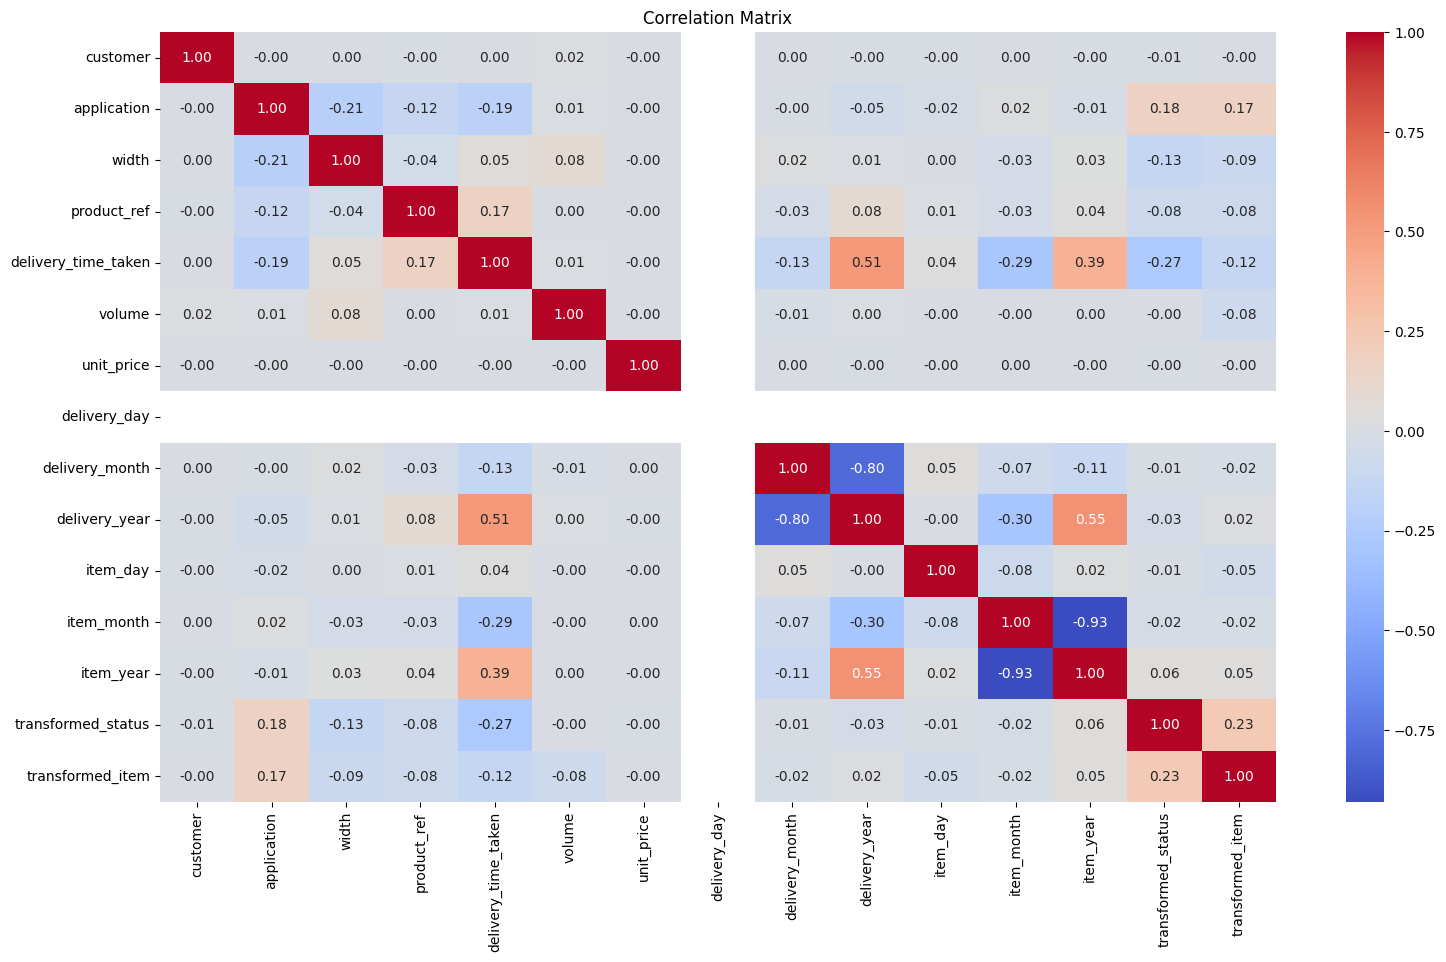

In [234]:
cor_col = df4.select_dtypes(include='number')
correlation_matrix = cor_col.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Classification Method  Prediction  (Won/Lose) model building

## Immporting Necessary libraries

In [235]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
import pickle


In [236]:
# df4.transformed_country.value_counts()

In [237]:
df4.transformed_status.value_counts()

transformed_status
1.000000    116012
0.000000     34438
Name: count, dtype: int64

In [238]:

# df4['transformed_status'] = df4['transformed_status'].map({1:1, 7:0})

# df4.columns

In [239]:
print(df4.transformed_status.unique())
df4.transformed_status.value_counts()

[1. 0.]


transformed_status
1.000000    116012
0.000000     34438
Name: count, dtype: int64

In [240]:
# df4=pd.read_csv('df4.csv')

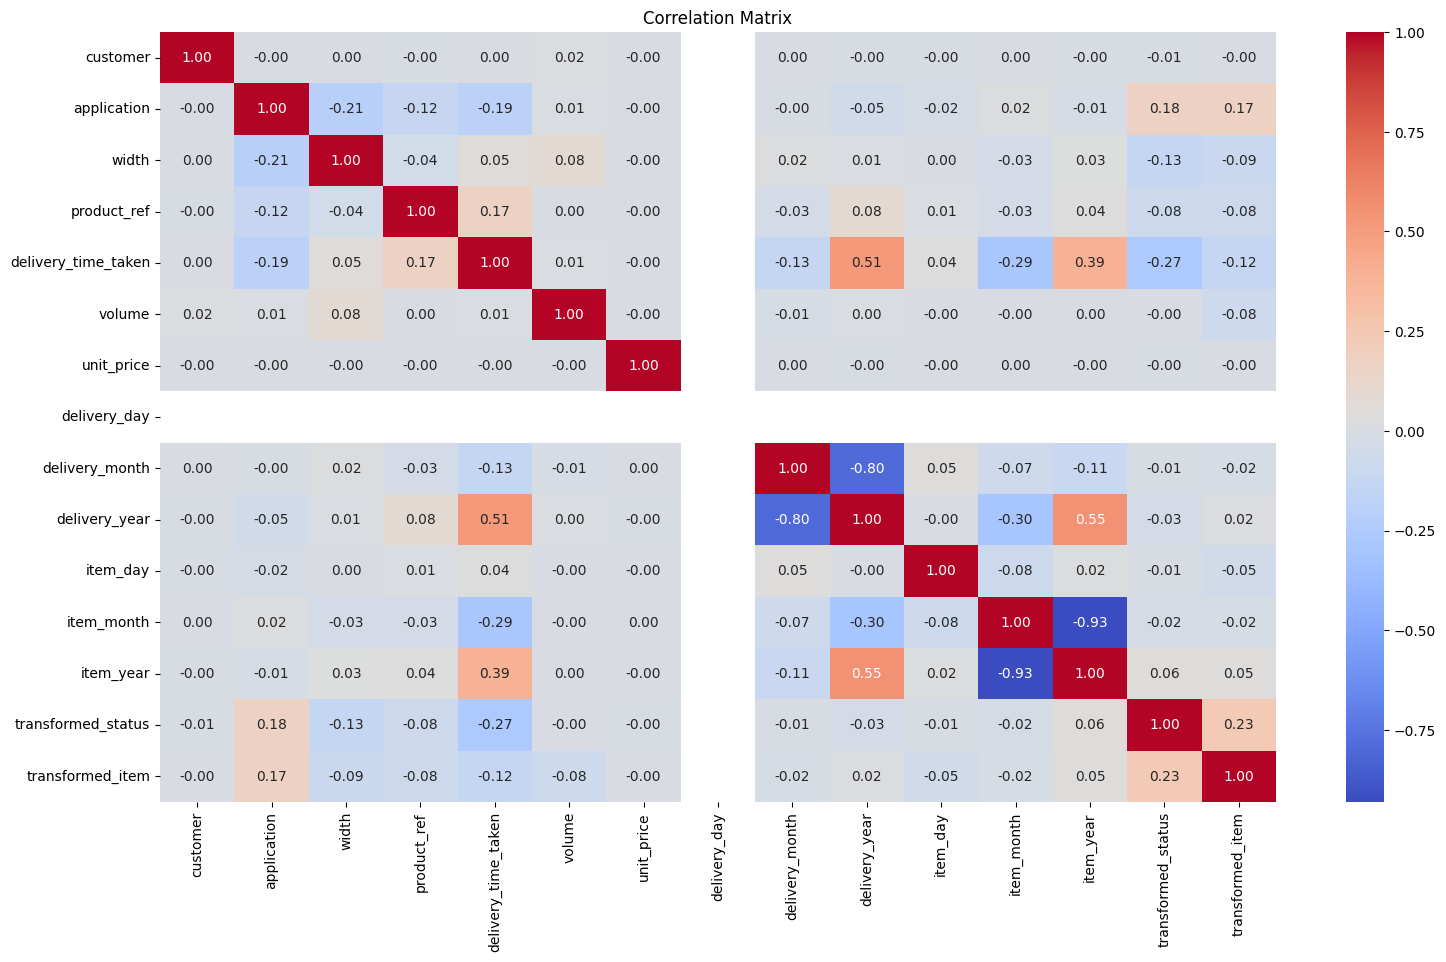

In [241]:
cor_col = df4.select_dtypes(include='number')
correlation_matrix = cor_col.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [242]:
target_corr = df4.corr()['transformed_status'].abs().sort_values(ascending=False)[1:]
target_corr

delivery_time_taken   0.267134
transformed_item      0.234331
application           0.177273
width                 0.125992
product_ref           0.081066
item_year             0.055570
delivery_year         0.030012
item_month            0.023996
customer              0.008721
item_day              0.008458
delivery_month        0.008436
unit_price            0.004462
volume                0.000652
delivery_day               NaN
Name: transformed_status, dtype: float64

In [243]:
x= df4.drop('transformed_status', axis=1)

y=df4[['transformed_status']].values.ravel()

x, y= SMOTETomek().fit_resample(x,y)

In [244]:
df4

,customer,application,width,product_ref,delivery_time_taken,volume,unit_price,delivery_day,delivery_month,delivery_year,item_day,item_month,item_year,transformed_status,transformed_item
0,30156308,10,1500,1670798778,91,162453.414917,7.885337,1,7,2021,1,4,2021,1.000000,5
1,30202938,41,1210,1668701718,0,743448.031616,1.704046,1,4,2021,1,4,2021,1.000000,5
2,30153963,28,952,628377,90,139685.648560,4.391304,1,1,2021,1,4,2021,1.000000,6
3,30349574,59,1317,1668701718,90,613123.345367,1.649678,1,1,2021,1,4,2021,1.000000,3
4,30211560,10,2000,640665,31,6284209.960938,0.183635,1,3,2021,1,4,2021,1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854,41,1220,164141591,1,120027.412872,6.007128,1,7,2020,2,7,2020,1.000000,5
181669,30200854,41,1500,164141591,1,296523.216248,2.979531,1,7,2020,2,7,2020,1.000000,5
181670,30200854,41,1250,164141591,1,3759.089410,205.834423,1,7,2020,2,7,2020,1.000000,5
181671,30200854,41,1250,164141591,1,32262.828350,23.285311,1,7,2020,2,7,2020,1.000000,5


In [245]:
scale_class = StandardScaler().fit(x)
x=scale_class.transform(x)
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2 ,  random_state=42)

In [246]:
import os
pkl_path='pkls/scale_class.pkl'
os.makedirs(os.path.dirname(pkl_path), exist_ok=True)
with open (pkl_path,'wb' ) as file:
    pickle.dump(scale_class,file)
print(f'Pickle file created: {pkl_path}')


df4.to_csv('df4.csv')

Pickle file created: pkls/scale_class.pkl


In [247]:
modeler=[]
modeler.append(('DT_model',DecisionTreeClassifier()))
modeler.append(('RF_model',RandomForestClassifier()))
modeler.append(('ET_model', ExtraTreesClassifier()))
modeler.append(('AB_model',AdaBoostClassifier(algorithm='SAMME')))
modeler.append(('GB_model',GradientBoostingClassifier()))
modeler.append(('LR_model',LogisticRegression()))
modeler.append(('XGB_model',XGBClassifier()))


In [248]:
from colorama import Fore, Style

color_positive = Fore.GREEN
reset_color = Style.RESET_ALL

In [ ]:
for name, model in modeler:
    print(f"{color_positive}{name} - - {model}")
    print()
    model.fit(x_train,y_train)
    y_preds=model.predict(x_test)
    y_preds_train=model.predict(x_train)
    print(f"{color_positive}Confusion Matrix {reset_color} -- {confusion_matrix(y_test,y_preds)}")
    print()
    print(f'{color_positive}Accuracy {reset_color} - {accuracy_score(y_test,y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}')
    print()
    print(f'{color_positive}Precision {reset_color} - {precision_score(y_test,y_preds)}')
    print()
    print(f'{color_positive}Recall - {reset_color} {recall_score(y_test,y_preds)}')
    print()
    print(f'{color_positive}F1_score - {reset_color} {f1_score(y_test,y_preds)}')
    print('-'*40)
    print()

DT_model - - DecisionTreeClassifier()

Confusion Matrix  -- [[20849   783]
 [  747 20689]]

Accuracy  - 0.9644747840624129
Accuracy Train - 1.0

Precision  - 0.9635339046199702

Recall -  0.9651520806120545

F1_score -  0.9643423137876387
----------------------------------------

RF_model - - RandomForestClassifier()

Confusion Matrix  -- [[21241   391]
 [  666 20770]]

Accuracy  - 0.9754574161790657
Accuracy Train - 1.0

Precision  - 0.9815226123529134

Recall -  0.9689307706661691

F1_score -  0.9751860459656784
----------------------------------------

ET_model - - ExtraTreesClassifier()

Confusion Matrix  -- [[21281   351]
 [  583 20853]]

Accuracy  - 0.978313364911303
Accuracy Train - 1.0

Precision  - 0.983446519524618

Recall -  0.9728027617092742

F1_score -  0.9780956848030019
----------------------------------------

AB_model - - AdaBoostClassifier(algorithm='SAMME')

Confusion Matrix  -- [[17426  4206]
 [ 4562 16874]]

Accuracy  - 0.7964149716727036
Accuracy Train - 0.794914

In [119]:
param_grid = {
    
    'max_depth': [None, 5, 10],          # Maximum depth of each tree
    'min_samples_split': [2, 1, 3],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 3]            # Minimum number of samples required at each leaf node
}

# {'max_depth': 20,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2}

In [120]:
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2,  random_state=42)
grid_search_rf = GridSearchCV(estimator= RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)

In [121]:
grid_search_rf.fit(x_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


e:\Technology\Python Project\Capstone\Copper_Modeling\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Technology\Python Project\Capstone\Copper_Modeling\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Technology\Python Project\Capstone\Copper_Modeling\venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "e:\Technology\Python Project\Capstone\Copper_Modeling\venv\Lib\site-packages

In [106]:
grid_search_rf.cv_results_

{'mean_fit_time': array([ 96.70061741,  94.78199234,  92.98480635,  96.84409971,
         96.34928455,  93.35915027,  94.55641999,  96.78173242,
        133.45778627, 134.72171869, 134.19386024, 125.26527486,
        127.90524478, 138.5517684 , 143.47876358, 147.65000339]),
 'std_fit_time': array([1.02790075, 1.83802294, 2.09262576, 1.25443564, 1.82407579,
        0.78263182, 1.75312724, 1.89566699, 1.3237778 , 2.52483134,
        1.15680878, 5.42971943, 5.03898839, 4.62799377, 4.48386601,
        3.5787201 ]),
 'mean_score_time': array([0.9615756 , 1.15908251, 1.00257206, 0.95336256, 0.87684703,
        0.85797596, 1.14371676, 1.423353  , 2.35997887, 2.15313649,
        1.80718126, 2.28278346, 2.26607451, 3.74328766, 4.02935252,
        2.01556458]),
 'std_score_time': array([0.06453417, 0.45514589, 0.05583764, 0.0860037 , 0.0492814 ,
        0.04586952, 0.26753837, 0.3062541 , 0.24433807, 0.19962999,
        0.10467255, 0.63412322, 0.63256489, 0.58213154, 1.29093109,
        0.242748

In [107]:
grid_search_rf.best_score_

0.9630058387688013

In [108]:
grid_search_rf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [110]:
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2,  random_state=42)

model=RandomForestClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=2,max_features='sqrt')
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
y_preds_train=model.predict(x_train)
print(f"{color_positive}Confusion Matrix {reset_color} -- {confusion_matrix(y_test,y_preds)}")
print()
print(f'{color_positive}Accuracy {reset_color} - {accuracy_score(y_test,y_preds)}')
print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}')
print()
print(f'{color_positive}Precision {reset_color} - {precision_score(y_test,y_preds)}')
print()
print(f'{color_positive}Recall - {reset_color} {recall_score(y_test,y_preds)}')
print()
print(f'{color_positive}F1_score - {reset_color} {f1_score(y_test,y_preds)}')
print()
print(f'{color_positive}classification Report - {reset_color} {classification_report(y_true=y_test,y_pred=y_preds)}')

Confusion Matrix  -- [[21245  1328]
 [  264 22306]]

Accuracy  - 0.9647342888155417
Accuracy Train - 0.986786214688014

Precision  - 0.9438097655919439

Recall -  0.9883030571555161

F1_score -  0.9655441087351745

classification Report -                precision    recall  f1-score   support

           0       0.99      0.94      0.96     22573
           1       0.94      0.99      0.97     22570

    accuracy                           0.96     45143
   macro avg       0.97      0.96      0.96     45143
weighted avg       0.97      0.96      0.96     45143



In [ ]:
et_model = ExtraTreesClassifier()
grid_search_et = GridSearchCV(estimator=et_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search_et.fit(x_train, y_train)

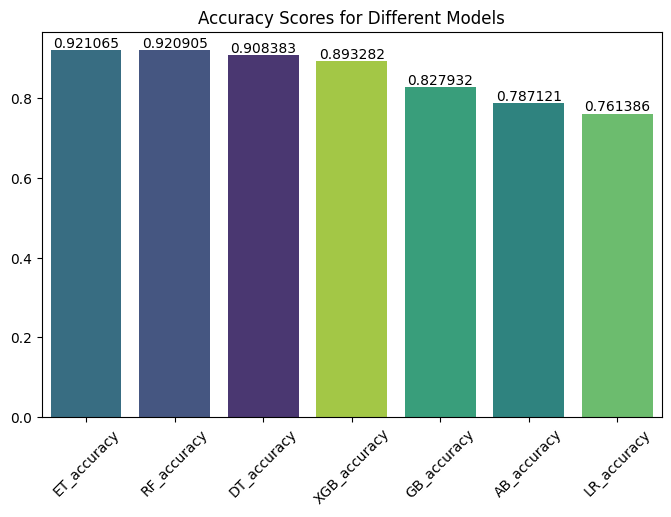

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(df,x=models,y=scores,hue=models,palette='viridis',order=df['Model'])
for container in ax.containers:
  ax.bar_label(container, fontsize=10);
plt.xticks(rotation=45)
plt.title('Accuracy Scores for Different Models')
plt.show()

<!-- DT_model - - DecisionTreeClassifier()

Confusion Matrix  -- [[27992   938]
 [  990  7693]]

Accuracy  - 0.9487411267380959

Precision  - 0.8913219789132197

Recall -  0.8859841068755039

F1_score -  0.8886450271456625
----------------------------------------

RF_model - - RandomForestClassifier()

Confusion Matrix  -- [[28326   604]
 [ 1142  7541]]

Accuracy  - 0.9535798792970516

Precision  - 0.9258440761203192

Recall -  0.8684786364159852

F1_score -  0.8962443546470169
----------------------------------------

ET_model - - ExtraTreesClassifier()

Confusion Matrix  -- [[28264   666]
 [ 1026  7657]]

Accuracy  - 0.9550155531332252

Precision  - 0.9199807761624414

Recall -  0.8818380743982495

F1_score -  0.9005057038692226
----------------------------------------

AB_model - - AdaBoostClassifier(algorithm='SAMME')

Confusion Matrix  -- [[27708  1222]
 [ 6702  1981]]

Accuracy  - 0.7893281578177758

Precision  - 0.6184826724945364

Recall -  0.2281469538178049

F1_score -  0.3333333333333333
----------------------------------------

GB_model - - GradientBoostingClassifier()

Confusion Matrix  -- [[27735  1195]
 [ 5121  3562]]

Accuracy  - 0.8320793342727248

Precision  - 0.7487912549926424

Recall -  0.41022688011056085

F1_score -  0.5300595238095238
----------------------------------------

LR_model - - LogisticRegression()

Confusion Matrix  -- [[27675  1255]
 [ 7115  1568]]

Accuracy  - 0.7774705553930822

Precision  - 0.5554374778604322

Recall -  0.18058274789819187

F1_score -  0.2725534503737181
----------------------------------------

XGB_model - - XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Confusion Matrix  -- [[27886  1044]
 [ 1647  7036]]

Accuracy  - 0.9284555871640124

Precision  - 0.8707920792079208

Recall -  0.8103190141656109

F1_score -  0.8394678756785778
---------------------------------------- -->
